# Merge Data Files

In [1]:
import pandas as pd
import glob

# Path to the directory containing CSV files
path = '/home/ez2422/ground_level_data_1/'

# Get all CSV files (exclude hidden/temporary files)
all_files = [f for f in glob.glob(path + '*.csv') if not f.startswith(path + '.')]
print(f"Found {len(all_files)} files to merge.")

Found 35 files to merge.


In [2]:
# Initialize an empty list to store DataFrames
dfs = []

# Read each file and append to the list
for file in all_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Combine all DataFrames into one
merged_df = pd.concat(dfs, ignore_index=True)

# Display the merged data
print(merged_df.head())
print(f"Merged DataFrame shape: {merged_df.shape}")

/tmp/ipykernel_93772/1421351222.py:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


  Data line idenifier            Date/Time  Channel #  \
0                 4FC  2021/01/19 06:16:00         50   
1                 44C  2021/01/19 06:17:00         50   
2                 4BC  2021/01/19 06:18:00         50   
3                 46C  2021/01/19 06:19:00         50   
4                 48C  2021/01/19 06:20:00         50   

   NO Concentration - Instantaneous  Channel #.1  NOx Conc -Instaneous  \
0                               0.0           51                   0.0   
1                               0.0           51                   0.0   
2                               0.0           51                   0.0   
3                               0.0           51                   0.0   
4                               0.0           51                   0.0   

   Channel  NO2 Conc - Instantanoues  Channel #.2  PGA Gain  ...  Channel #.6  \
0     52.0                       0.0         49.0      64.0  ...         77.0   
1     52.0                       0.0         49.0 

In [3]:
# Save to a new CSV file
output_path = '/home/ez2422/merged_ground_level_data_all_years.csv'
merged_df.to_csv(output_path, index=False)
print(f"Saved merged data to: {output_path}")

Saved merged data to: /home/ez2422/merged_ground_level_data_all_years.csv


In [4]:
# Read your CSV file
df = pd.read_csv('/home/ez2422/merged_ground_level_data_all_years.csv')

# Ensure all columns are shown when printing
pd.set_option('display.max_columns', None)

# Show the first few rows with all columns
df.head()

/tmp/ipykernel_93772/1334770567.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/ez2422/merged_ground_level_data_all_years.csv')


Data line idenifier            Date/Time  Channel #  \
0                 4FC  2021/01/19 06:16:00         50   
1                 44C  2021/01/19 06:17:00         50   
2                 4BC  2021/01/19 06:18:00         50   
3                 46C  2021/01/19 06:19:00         50   
4                 48C  2021/01/19 06:20:00         50   

   NO Concentration - Instantaneous  Channel #.1  NOx Conc -Instaneous  \
0                               0.0           51                   0.0   
1                               0.0           51                   0.0   
2                               0.0           51                   0.0   
3                               0.0           51                   0.0   
4                               0.0           51                   0.0   

   Channel  NO2 Conc - Instantanoues  Channel #.2  PGA Gain  Channel #.3  \
0     52.0                       0.0         49.0      64.0         56.0   
1     52.0                       0.0         49.0      64.0         56.0   
2     52.0                       0.0         49.0      64.0         56.0   
3     52.0                       0.0         49.0      64.0         56.0   
4     52.0                       0.0         49.0      64.0         56.0   

   Instrument Gain  Channel #.4  High Voltage  Channel #.5  Gas Pressure  \
0         2.793214         67.0     652.78918         72.0     129.49174   
1         2.793214         67.0     652.78918         72.0     129.29796   
2         2.793214         67.0     652.78918         72.0     129.00839   
3         2.793214         67.0     652.78918         72.0     128.67938   
4         2.793214         67.0     652.78918         72.0     128.35463   

   Channel #.6  Chasis Temperature ©  Channel #.7  Instrument Status  \
0         77.0              29.34375         83.0            36355.0   
1         77.0              30.09375         83.0            36355.0   
2         77.0              30.78125         83.0            36355.0   
3         77.0              31.50000         83.0            35331.0   
4         77.0              32.12500         83.0            35331.0   

   Channel #.8  Instrument State (see Appendix A.3 of Manual for Key)  \
0        110.0                                               29.0       
1        110.0                                               29.0       
2        110.0                                               29.0       
3        110.0                                               29.0       
4        110.0                                               29.0       

   Channel #.9 Instrument units (see key -but 1 measn ppb  Channel #.10  \
0        116.0                                          1         164.0   
1        116.0                                          1         164.0   
2        116.0                                          1         164.0   
3        116.0                                          1         164.0   
4        116.0                                          1         164.0   

   Filter Type  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

In [5]:
# Define the columns to keep
columns_to_keep = [
    'Date/Time',
    'NO Concentration - Instantaneous',
    'NOx Conc -Instaneous',
    'NO2 Conc - Instantanoues']

# Filter the DataFrame
filtered_df = df[columns_to_keep]
filtered_df

# Optional: Rename columns for easier use
filtered_df.columns = [
    'Datetime',
    'NO_ppb',
    'NOx_ppb',
    'NO2_ppb'
]

# Preview the result
filtered_df.head()

Datetime  NO_ppb  NOx_ppb  NO2_ppb
0  2021/01/19 06:16:00     0.0      0.0      0.0
1  2021/01/19 06:17:00     0.0      0.0      0.0
2  2021/01/19 06:18:00     0.0      0.0      0.0
3  2021/01/19 06:19:00     0.0      0.0      0.0
4  2021/01/19 06:20:00     0.0      0.0      0.0

In [6]:
# Import December Data
import os
import re

folder_path = 'december'
file_paths = glob.glob(os.path.join(folder_path, '*.txt')) + glob.glob(os.path.join(folder_path, '*.TXT'))

data = []

for file in file_paths:
    with open(file, 'r') as f:
        for line in f:
            match = re.findall(r'[^,]+', line.strip())
            if len(match) >= 8:
                try:
                    data.append({
                        'Datetime': match[1].strip(),
                        'NO_ppb': float(match[3].strip()),
                        'NOx_ppb': float(match[5].strip()),
                        'NO2_ppb': float(match[7].strip())
                    })
                except ValueError:
                    continue

# Create DataFrame if data exists
december = pd.DataFrame(data)
december['Datetime'] = pd.to_datetime(december['Datetime'], errors='coerce')
print(december.head())

             Datetime    NO_ppb   NOx_ppb   NO2_ppb
0 2024-12-15 00:00:01  1.981271  1.138966 -0.842304
1 2024-12-15 00:01:00  1.430715  1.062322 -0.368393
2 2024-12-15 00:02:00  1.532132  0.677897 -0.854236
3 2024-12-15 00:03:00  1.847542  0.489835 -1.357707
4 2024-12-15 00:04:00  1.728224  1.659537 -0.068687


In [7]:
# Import January Data
folder_path = 'january'
file_paths = glob.glob(os.path.join(folder_path, '*.txt')) + glob.glob(os.path.join(folder_path, '*.TXT'))

data = []

for file in file_paths:
    with open(file, 'r') as f:
        for line in f:
            match = re.findall(r'[^,]+', line.strip())
            if len(match) >= 8:
                try:
                    data.append({
                        'Datetime': match[1].strip(),
                        'NO_ppb': float(match[3].strip()),
                        'NOx_ppb': float(match[5].strip()),
                        'NO2_ppb': float(match[7].strip())
                    })
                except ValueError:
                    continue

# Create DataFrame
january = pd.DataFrame(data)
january['Datetime'] = pd.to_datetime(january['Datetime'], errors='coerce')
print(january.head(10))

             Datetime    NO_ppb   NOx_ppb   NO2_ppb
0 2025-01-05 00:00:01  1.322818  1.035049 -0.287769
1 2025-01-05 00:01:00  0.912977  1.549730  0.636753
2 2025-01-05 00:02:00  0.968301  0.996515  0.028214
3 2025-01-05 00:03:00  2.025492  1.300009 -0.725483
4 2025-01-05 00:04:00  2.415950  0.929098 -1.486852
5 2025-01-05 00:05:00  2.131957  1.003435 -1.128522
6 2025-01-05 00:06:00  2.010816  1.275386 -0.735430
7 2025-01-05 00:07:00  1.722736  1.144925 -0.577811
8 2025-01-05 00:08:00  1.428341  1.265248 -0.163093
9 2025-01-05 00:09:00  1.881122  0.266004 -1.615117


In [8]:
# Import February Data
folder_path = 'february'
file_paths = glob.glob(os.path.join(folder_path, '*.txt')) + glob.glob(os.path.join(folder_path, '*.TXT'))

data = []

for file in file_paths:
    with open(file, 'r') as f:
        for line in f:
            match = re.findall(r'[^,]+', line.strip())
            if len(match) >= 8:
                try:
                    data.append({
                        'Datetime': match[1].strip(),
                        'NO_ppb': float(match[3].strip()),
                        'NOx_ppb': float(match[5].strip()),
                        'NO2_ppb': float(match[7].strip())
                    })
                except ValueError:
                    continue

# Create DataFrame
february = pd.DataFrame(data)
february['Datetime'] = pd.to_datetime(february['Datetime'], errors='coerce')
print(february.head(10))

             Datetime    NO_ppb   NOx_ppb   NO2_ppb
0 2025-02-02 00:00:01  4.066899  3.021518 -1.045381
1 2025-02-02 00:01:00  3.535651  2.449773 -1.085877
2 2025-02-02 00:02:00  3.458694  2.582032 -0.876662
3 2025-02-02 00:03:00  3.895297  3.207275 -0.688021
4 2025-02-02 00:04:00  3.628241  2.916443 -0.711798
5 2025-02-02 00:05:00  3.033471  2.973202 -0.060269
6 2025-02-02 00:06:00  1.765490  1.446037 -0.319453
7 2025-02-02 00:07:00  1.120510  0.564397 -0.556113
8 2025-02-02 00:08:00  1.071180  0.144796 -0.926384
9 2025-02-02 00:09:00  1.162339  0.420867 -0.741472


In [9]:
# Import March Data
folder_path = 'march'
file_paths = glob.glob(os.path.join(folder_path, '*.txt')) + glob.glob(os.path.join(folder_path, '*.TXT'))

data = []

for file in file_paths:
    with open(file, 'r') as f:
        for line in f:
            match = re.findall(r'[^,]+', line.strip())
            if len(match) >= 8:
                try:
                    data.append({
                        'Datetime': match[1].strip(),
                        'NO_ppb': float(match[3].strip()),
                        'NOx_ppb': float(match[5].strip()),
                        'NO2_ppb': float(match[7].strip())
                    })
                except ValueError:
                    continue

# Create DataFrame
march = pd.DataFrame(data)
march['Datetime'] = pd.to_datetime(march['Datetime'], errors='coerce')
print(march.head(10))

             Datetime    NO_ppb   NOx_ppb   NO2_ppb
0 2025-03-06 00:00:01  0.397848  1.134040  0.736191
1 2025-03-06 00:01:00  0.345157  0.644027  0.298870
2 2025-03-06 00:02:00  0.691808 -0.362768 -1.054576
3 2025-03-06 00:03:00  0.744988  1.019882  0.274894
4 2025-03-06 00:04:00  0.872094  1.380438  0.508344
5 2025-03-06 00:05:00  1.302412  0.679581 -0.622832
6 2025-03-06 00:06:00  1.144677  3.236111  2.091435
7 2025-03-06 00:07:00  1.897579  1.424774 -0.472805
8 2025-03-06 00:08:00  1.965541  1.583905 -0.381636
9 2025-03-06 00:09:00  2.089555 -0.448216 -2.537771


In [10]:
# Import April Data
folder_path = 'april'
file_paths = glob.glob(os.path.join(folder_path, '*.txt')) + glob.glob(os.path.join(folder_path, '*.TXT'))

data = []

for file in file_paths:
    with open(file, 'r') as f:
        for line in f:
            match = re.findall(r'[^,]+', line.strip())
            if len(match) >= 8:
                try:
                    data.append({
                        'Datetime': match[1].strip(),
                        'NO_ppb': float(match[3].strip()),
                        'NOx_ppb': float(match[5].strip()),
                        'NO2_ppb': float(match[7].strip())
                    })
                except ValueError:
                    continue

# Create DataFrame
april = pd.DataFrame(data)
april['Datetime'] = pd.to_datetime(april['Datetime'], errors='coerce')
print(april.head(10))

             Datetime    NO_ppb   NOx_ppb   NO2_ppb
0 2025-04-06 00:00:01  2.953868  5.459667  2.505798
1 2025-04-06 00:01:00  2.764903  5.387651  2.622748
2 2025-04-06 00:02:00  3.014473  4.846850  1.832377
3 2025-04-06 00:03:00  3.086393  4.640383  1.553990
4 2025-04-06 00:04:00  3.187948  4.906167  1.718219
5 2025-04-06 00:05:00  3.050229  5.120471  2.070241
6 2025-04-06 00:06:00  2.862818  4.980660  2.117842
7 2025-04-06 00:07:00  2.974341  4.861021  1.886680
8 2025-04-06 00:08:00  3.082923  5.234611  2.151689
9 2025-04-06 00:09:00  3.039863  5.313055  2.273192


In [11]:
# Import May Data
folder_path = 'may'
file_paths = glob.glob(os.path.join(folder_path, '*.txt')) + glob.glob(os.path.join(folder_path, '*.TXT'))

data = []

for file in file_paths:
    with open(file, 'r') as f:
        for line in f:
            match = re.findall(r'[^,]+', line.strip())
            if len(match) >= 8:
                try:
                    data.append({
                        'Datetime': match[1].strip(),
                        'NO_ppb': float(match[3].strip()),
                        'NOx_ppb': float(match[5].strip()),
                        'NO2_ppb': float(match[7].strip())
                    })
                except ValueError:
                    continue

# Create DataFrame
may = pd.DataFrame(data)
may['Datetime'] = pd.to_datetime(may['Datetime'], errors='coerce')
print(may.head(10))

             Datetime    NO_ppb   NOx_ppb   NO2_ppb
0 2025-05-07 00:00:01  3.514028  6.583462  3.069434
1 2025-05-07 00:01:00  2.258294  5.099712  2.841418
2 2025-05-07 00:02:00  2.411288  5.114804  2.703516
3 2025-05-07 00:03:00  3.062598  5.917239  2.854641
4 2025-05-07 00:04:00  3.486975  6.281867  2.794892
5 2025-05-07 00:05:00  3.964572  6.694387  2.729815
6 2025-05-07 00:06:00  4.106045  7.046851  2.940806
7 2025-05-07 00:07:00  3.918957  6.814001  2.895044
8 2025-05-07 00:08:00  5.455981  8.167328  2.711347
9 2025-05-07 00:09:00  6.701317  9.751116  3.049799


In [12]:
# Import April Data
folder_path = 'june'
file_paths = glob.glob(os.path.join(folder_path, '*.txt')) + glob.glob(os.path.join(folder_path, '*.TXT'))

data = []

for file in file_paths:
    with open(file, 'r') as f:
        for line in f:
            match = re.findall(r'[^,]+', line.strip())
            if len(match) >= 8:
                try:
                    data.append({
                        'Datetime': match[1].strip(),
                        'NO_ppb': float(match[3].strip()),
                        'NOx_ppb': float(match[5].strip()),
                        'NO2_ppb': float(match[7].strip())
                    })
                except ValueError:
                    continue

# Create DataFrame
june = pd.DataFrame(data)
june['Datetime'] = pd.to_datetime(june['Datetime'], errors='coerce')
print(june.head(10))

             Datetime    NO_ppb   NOx_ppb   NO2_ppb
0 2025-06-08 00:00:01  3.284271  5.288157  2.003887
1 2025-06-08 00:01:00  4.205513  6.268711  2.063198
2 2025-06-08 00:02:00  4.598497  6.771594  2.173097
3 2025-06-08 00:03:00  3.461886  5.639825  2.177939
4 2025-06-08 00:04:00  2.184984  4.374804  2.189820
5 2025-06-08 00:05:00  2.576073  4.664503  2.088430
6 2025-06-08 00:06:00  2.545421  4.470104  1.924683
7 2025-06-08 00:07:00  2.112882  4.006599  1.893717
8 2025-06-08 00:08:00  1.700209  3.582011  1.881802
9 2025-06-08 00:09:00  1.805070  3.506684  1.701613


In [13]:
filtered_df = pd.concat([filtered_df, december, january, february, march, april, may, june], ignore_index=True)
filtered_df

Datetime    NO_ppb   NOx_ppb   NO2_ppb
0        2021/01/19 06:16:00  0.000000  0.000000  0.000000
1        2021/01/19 06:17:00  0.000000  0.000000  0.000000
2        2021/01/19 06:18:00  0.000000  0.000000  0.000000
3        2021/01/19 06:19:00  0.000000  0.000000  0.000000
4        2021/01/19 06:20:00  0.000000  0.000000  0.000000
...                      ...       ...       ...       ...
1470420  2025-06-02 23:55:00  1.756730  3.925394  2.168664
1470421  2025-06-02 23:56:00  1.811191  3.963366  2.152175
1470422  2025-06-02 23:57:00  1.695147  3.766216  2.071069
1470423  2025-06-02 23:58:00  1.530071  3.577743  2.047672
1470424  2025-06-02 23:59:00  1.540916  3.471457  1.930541

[1470425 rows x 4 columns]

# Manipulate Data

In [14]:
# Convert datatype of datetime column
filtered_df['Datetime'] = pd.to_datetime(filtered_df['Datetime'], format='%Y/%m/%d %H:%M:%S')
# Learn the format of columns
print(filtered_df.dtypes)

Datetime    datetime64[ns]
NO_ppb             float64
NOx_ppb            float64
NO2_ppb            float64
dtype: object


In [15]:
# Checking for missing data
filtered_df.isna().sum()

Datetime    0
NO_ppb      0
NOx_ppb     0
NO2_ppb     1
dtype: int64

In [16]:
# Calculate the median of NO2_ppb (ignoring NaNs)
median_no2 = filtered_df['NO2_ppb'].median()

# Fill missing values with the median
filtered_df['NO2_ppb'] = filtered_df['NO2_ppb'].fillna(median_no2)

# Verify that missing values are filled
print(filtered_df.isna().sum())

Datetime    0
NO_ppb      0
NOx_ppb     0
NO2_ppb     0
dtype: int64


In [17]:
# Shorten the df name
df = filtered_df

In [18]:
# Sort data by Datetime
df = df.sort_values(by="Datetime")
# Reset index
df = df.reset_index(drop=True)
# View data
df.head()

Datetime     NO_ppb    NOx_ppb    NO2_ppb
0 2021-01-14 05:48:00  15.168343  50.143181  34.974838
1 2021-01-14 05:49:00   5.453504  17.336376  11.882874
2 2021-01-14 05:50:00   2.351893  17.163208  14.811316
3 2021-01-14 05:51:00  15.131422  41.418922  26.287502
4 2021-01-14 05:52:00  39.061401  72.540001  33.478600

In [19]:
# Make sure 'Datetime' is in datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract year, month, day
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day

# Extract time as HH:MM:SS string
df['Time'] = df['Datetime'].dt.time

# Show the data
print(df.head())

             Datetime     NO_ppb    NOx_ppb    NO2_ppb  Year  Month  Day  \
0 2021-01-14 05:48:00  15.168343  50.143181  34.974838  2021      1   14   
1 2021-01-14 05:49:00   5.453504  17.336376  11.882874  2021      1   14   
2 2021-01-14 05:50:00   2.351893  17.163208  14.811316  2021      1   14   
3 2021-01-14 05:51:00  15.131422  41.418922  26.287502  2021      1   14   
4 2021-01-14 05:52:00  39.061401  72.540001  33.478600  2021      1   14   

       Time  
0  05:48:00  
1  05:49:00  
2  05:50:00  
3  05:51:00  
4  05:52:00  


In [20]:
# Rearrange columns: Year, Month, Day, Time first, then pollutant columns
new_order = ['Year', 'Month', 'Day', 'Time', 'NO_ppb', 'NO2_ppb', 'NOx_ppb']
df = df[new_order]
# View data
df.head(1000).tail()

Year  Month  Day      Time    NO_ppb    NO2_ppb    NOx_ppb
995  2021      1   27  01:40:00  3.371002  11.036379  14.407381
996  2021      1   27  01:41:00  1.111320  12.191843  13.303164
997  2021      1   27  01:42:00  1.448329   8.183020   9.631349
998  2021      1   27  01:43:00  2.174945   7.375760   9.550705
999  2021      1   27  01:44:00  4.725075  10.226366  14.951441

In [21]:
# Extract hour from Time column
df['Hour'] = df['Time'].apply(lambda t: t.hour)

# If you want, you can drop the original 'Time' column
df = df.drop(columns=['Time'])

# Reorder columns if needed (put 'Hour' after 'Day')
cols = ['Year', 'Month', 'Day', 'Hour', 'NO_ppb', 'NO2_ppb', 'NOx_ppb']
df = df[cols]

print(df.tail())

         Year  Month  Day  Hour    NO_ppb   NO2_ppb    NOx_ppb
1470420  2025      6   30    23  3.425523  2.460115   5.885639
1470421  2025      6   30    23  6.782421  2.444969   9.227390
1470422  2025      6   30    23  7.314733  2.969796  10.284528
1470423  2025      6   30    23  3.542480  2.890490   6.432971
1470424  2025      6   30    23  3.508768  2.636224   6.144991


In [22]:
# Create a proper datetime column 
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
# Reorder columns 
cols = ['Date', 'Year', 'Month', 'Day', 'Hour', 'NO_ppb', 'NO2_ppb', 'NOx_ppb']
df = df[cols]
# View data
df.tail()

Date  Year  Month  Day  Hour    NO_ppb   NO2_ppb  \
1470420 2025-06-30 23:00:00  2025      6   30    23  3.425523  2.460115   
1470421 2025-06-30 23:00:00  2025      6   30    23  6.782421  2.444969   
1470422 2025-06-30 23:00:00  2025      6   30    23  7.314733  2.969796   
1470423 2025-06-30 23:00:00  2025      6   30    23  3.542480  2.890490   
1470424 2025-06-30 23:00:00  2025      6   30    23  3.508768  2.636224   

           NOx_ppb  
1470420   5.885639  
1470421   9.227390  
1470422  10.284528  
1470423   6.432971  
1470424   6.144991

In [23]:
# Drop rows where any pollutant is less than 1 
df = df[~((df['NO_ppb'] < 1) | (df['NO2_ppb'] < 1) | (df['NOx_ppb'] < 1))].copy()
# View data
df.tail()

Date  Year  Month  Day  Hour    NO_ppb   NO2_ppb  \
1470420 2025-06-30 23:00:00  2025      6   30    23  3.425523  2.460115   
1470421 2025-06-30 23:00:00  2025      6   30    23  6.782421  2.444969   
1470422 2025-06-30 23:00:00  2025      6   30    23  7.314733  2.969796   
1470423 2025-06-30 23:00:00  2025      6   30    23  3.542480  2.890490   
1470424 2025-06-30 23:00:00  2025      6   30    23  3.508768  2.636224   

           NOx_ppb  
1470420   5.885639  
1470421   9.227390  
1470422  10.284528  
1470423   6.432971  
1470424   6.144991

In [24]:
# Create scatter_df for scatter plots
scatter_df = df
# Create box_df for box plots
box_df = df
# Create diurnal_df for box plots
diurnal_df = df

In [25]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column 'DayDate' with only the date part (year-month-day)
df['DayDate'] = df['Date'].dt.floor('d')  # removes the time (hour, min, sec)

# Group by 'DayDate' and take mean of the pollutant columns
daily_mean = df.groupby('DayDate')[['NO_ppb', 'NO2_ppb', 'NOx_ppb']].mean().reset_index()

# Remove 'Hour' column from original df
df = df.drop(columns=['Hour'])

# Now, daily_mean has one row per day with mean values, and df has no Hour column
print(daily_mean.tail(20))

       DayDate     NO_ppb   NO2_ppb    NOx_ppb
838 2025-06-11   3.724353  2.243802   5.968155
839 2025-06-12   3.921830  2.325071   6.246901
840 2025-06-13   4.449414  2.605759   7.055173
841 2025-06-14   4.613313  2.259929   6.873242
842 2025-06-15   2.318581  1.912803   4.231384
843 2025-06-16   5.477837  2.699470   8.177307
844 2025-06-17   4.066645  2.460597   6.527242
845 2025-06-18   4.743208  2.638849   7.382057
846 2025-06-19   5.596051  2.743522   8.339573
847 2025-06-20  11.067333  4.078037  15.145369
848 2025-06-21   7.335571  3.344297  10.679867
849 2025-06-22   2.933849  2.442238   5.376087
850 2025-06-23   4.951948  3.114141   8.066088
851 2025-06-24   5.106746  3.497838   8.604583
852 2025-06-25   3.175784  2.242766   5.418549
853 2025-06-26   7.003693  3.096020  10.099713
854 2025-06-27   6.345370  3.177863   9.523233
855 2025-06-28   3.524014  2.094314   5.618328
856 2025-06-29   2.788758  2.072681   4.861439
857 2025-06-30   7.223199  3.403529  10.626728


In [26]:
import numpy as np
# Generate full date range from Jan 1, 2021 to Nov 30, 2024
full_dates = pd.date_range(start='2021-01-01', end='2025-06-30', freq='D')
full_df = pd.DataFrame({'DayDate': full_dates})

# Merge with your existing data (some dates will be NaN)
merged = pd.merge(full_df, daily_mean, on='DayDate', how='left')

# Replace 0s with NaN to treat them as missing
cols = ['NO_ppb', 'NO2_ppb', 'NOx_ppb']
merged[cols] = merged[cols].replace(0, np.nan)

# Add Year, Month, Week columns for grouping
merged['Year'] = merged['DayDate'].dt.year
merged['Month'] = merged['DayDate'].dt.month
merged['Week'] = merged['DayDate'].dt.isocalendar().week

# Define a function to fill each column
def fill_with_priority(df, col):
    df[col + '_filled'] = df[col]  # copy original
    for i, row in df[df[col].isna()].iterrows():
        y, m, w = row['Year'], row['Month'], row['Week']
        
        # Weekly average
        weekly_avg = df[(df['Year'] == y) & (df['Week'] == w)][col].mean()
        if pd.notna(weekly_avg):
            df.at[i, col + '_filled'] = weekly_avg
            continue
        
        # Monthly average
        monthly_avg = df[(df['Year'] == y) & (df['Month'] == m)][col].mean()
        if pd.notna(monthly_avg):
            df.at[i, col + '_filled'] = monthly_avg
            continue
        
        # Yearly average
        yearly_avg = df[df['Year'] == y][col].mean()
        if pd.notna(yearly_avg):
            df.at[i, col + '_filled'] = yearly_avg

    return df

# Apply to each pollutant
for col in cols:
    merged = fill_with_priority(merged, col)

# Final cleanup — keep DayDate and filled columns only
final_df = merged[['DayDate', 'NO_ppb_filled', 'NO2_ppb_filled', 'NOx_ppb_filled']].copy()
final_df.columns = ['DayDate', 'NO_ppb', 'NO2_ppb', 'NOx_ppb']

# Final result
print(final_df.tail(100).tail())

        DayDate    NO_ppb   NO2_ppb    NOx_ppb
1637 2025-06-26  7.003693  3.096020  10.099713
1638 2025-06-27  6.345370  3.177863   9.523233
1639 2025-06-28  3.524014  2.094314   5.618328
1640 2025-06-29  2.788758  2.072681   4.861439
1641 2025-06-30  7.223199  3.403529  10.626728


In [27]:
# Create new columns
final_df['Year'] = final_df['DayDate'].dt.year
final_df['Month'] = final_df['DayDate'].dt.month
final_df['Day'] = final_df['DayDate'].dt.day

In [28]:
# Reorder columns
final_df = final_df[['DayDate', 'Year', 'Month', 'Day', 'NO_ppb', 'NO2_ppb', 'NOx_ppb']]
df = final_df
df.tail()

DayDate  Year  Month  Day    NO_ppb   NO2_ppb    NOx_ppb
1637 2025-06-26  2025      6   26  7.003693  3.096020  10.099713
1638 2025-06-27  2025      6   27  6.345370  3.177863   9.523233
1639 2025-06-28  2025      6   28  3.524014  2.094314   5.618328
1640 2025-06-29  2025      6   29  2.788758  2.072681   4.861439
1641 2025-06-30  2025      6   30  7.223199  3.403529  10.626728

# Create Visuals Using Ground-Level Data

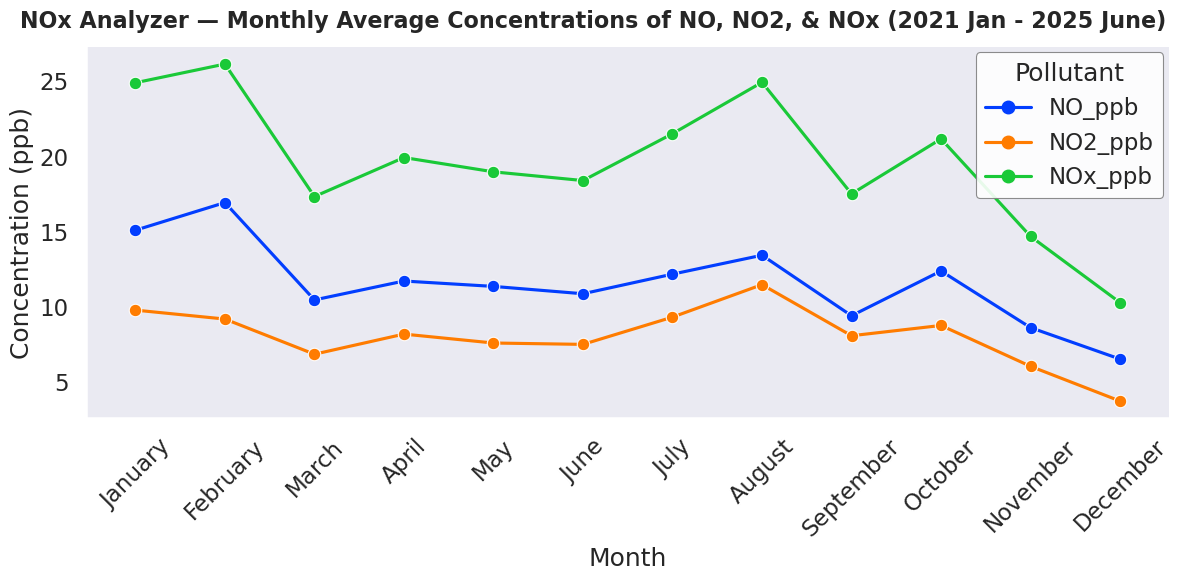

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Group by Month and calculate mean concentrations
monthly_avg = df.groupby("Month")[["NO_ppb", "NO2_ppb", "NOx_ppb"]].mean().reset_index()

# Convert month numbers to full month names
monthly_avg["Month"] = monthly_avg["Month"].apply(lambda x: calendar.month_name[int(x)])

# Ensure correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg["Month"] = pd.Categorical(monthly_avg["Month"], categories=month_order, ordered=True)

# Melt the dataframe into long format
monthly_melted = monthly_avg.melt(
    id_vars="Month", 
    value_vars=["NO_ppb", "NO2_ppb", "NOx_ppb"],
    var_name="Pollutant", 
    value_name="Concentration"
)

# Plotting with Seaborn
sns.set_style("dark")          
sns.set_context("talk")

g = sns.relplot(
    data=monthly_melted,
    x="Month",
    y="Concentration",
    hue="Pollutant",
    kind="line",
    aspect=2,
    height=6,
    marker="o",
    palette="bright"          
)

g.set_axis_labels("Month", "Concentration (ppb)")
g.fig.suptitle("NOx Analyzer — Monthly Average Concentrations of NO, NO2, & NOx (2021 Jan - 2025 June)", fontsize=16, fontweight='bold', x = 0.44)
g.set_xticklabels(rotation=45)

# Move legend outside and add background
legend = g._legend
legend.set_bbox_to_anchor((0.695, 0.90)) 
legend.set_loc("upper left")
legend.set_frame_on(True)               
legend.get_frame().set_edgecolor("gray")
legend.get_frame().set_linewidth(0.8)
legend.get_frame().set_facecolor("white")
legend.get_frame().set_alpha(0.9)       

plt.tight_layout()
plt.subplots_adjust(top=0.918, right=0.855)
plt.show()

/tmp/ipykernel_93772/2913350174.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_nox = df.groupby(["Weekday", "Year"])["NOx_ppb"].mean().reset_index()


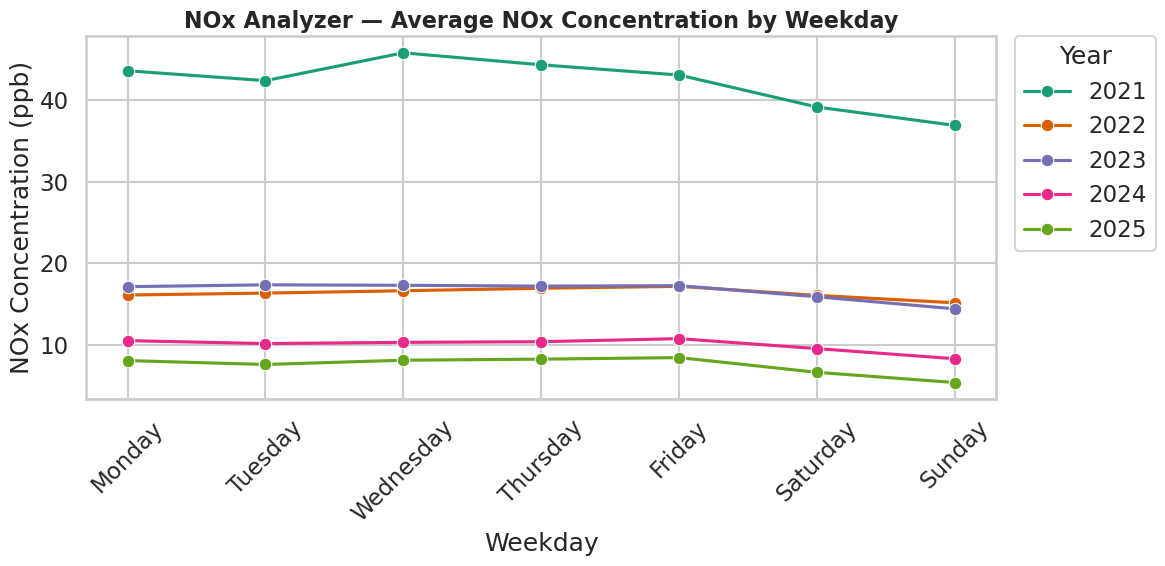

In [30]:
# Create the Weekday column from the Date
df["Weekday"] = df["DayDate"].dt.day_name()

# Order weekdays (Monday to Sunday)
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Weekday"] = pd.Categorical(df["Weekday"], categories=weekday_order, ordered=True)

# Group by Weekday and Year and calculate average NOx
weekday_nox = df.groupby(["Weekday", "Year"])["NOx_ppb"].mean().reset_index()

# Plot
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(12, 6))
plot = sns.lineplot(
    data=weekday_nox,
    x="Weekday", y="NOx_ppb",
    hue="Year", marker="o", palette="Dark2"
)

plt.title("NOx Analyzer — Average NOx Concentration by Weekday", fontsize=16, fontweight="bold")
plt.xlabel("Weekday")
plt.ylabel("NOx Concentration (ppb)")
plt.xticks(rotation=45)

# Move legend outside
plt.legend(title="Year", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

plt.tight_layout()
plt.show()

In [31]:
# Ensure DayDate column is datetime
df['DayDate'] = pd.to_datetime(df['DayDate'])

# Define date range
start_date = '2021-12-01'
end_date = '2022-07-31'

# Apply mask and set concentrations to 0 in that date range
mask = (df['DayDate'] >= start_date) & (df['DayDate'] <= end_date)
df.loc[mask, ['NO_ppb', 'NO2_ppb', 'NOx_ppb']] = 0

In [32]:
import pandas as pd
import plotly.express as px

# Create proper datetime column
df['Date2'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Create full monthly range covering all data dates
full_range = pd.date_range(
    start=df['Date2'].min().replace(day=1),
    end=df['Date2'].max().replace(day=1),
    freq='MS'  # Month Start frequency
)

# Extract YearMonth string column for original df
df['YearMonthStr'] = df['Date2'].dt.strftime('%Y-%m')

# Group original data by YearMonth and average
df['YearMonth'] = pd.to_datetime(df['Date2'].dt.to_period('M').astype(str))
df_monthly = df.groupby('YearMonth')[['NO_ppb', 'NO2_ppb', 'NOx_ppb']].mean().reset_index()

# Reindex df_monthly to full monthly range (filling missing months with NaN)
df_monthly = df_monthly.set_index('YearMonth').reindex(full_range).rename_axis('YearMonth').reset_index()

# Fill any remaining NaNs outside zeroed range by interpolation or forward-fill (optional)
df_monthly[['NO_ppb', 'NO2_ppb', 'NOx_ppb']] = df_monthly[['NO_ppb', 'NO2_ppb', 'NOx_ppb']].fillna(method='ffill').fillna(method='bfill')

# Set pollutant values to zero for Nov 2021 to Aug 2022 — re-apply here to ensure zeros are kept
zero_start = pd.to_datetime('2021-12-01')
zero_end = pd.to_datetime('2022-06-01')
mask_zero = (df_monthly['YearMonth'] >= zero_start) & (df_monthly['YearMonth'] <= zero_end)
df_monthly.loc[mask_zero, ['NO_ppb', 'NO2_ppb', 'NOx_ppb']] = 0

# Melt for plotting
df_melted = df_monthly.melt(
    id_vars='YearMonth',
    value_vars=['NO_ppb', 'NO2_ppb', 'NOx_ppb'],
    var_name='Pollutant',
    value_name='Concentration'
)

# Plot
fig = px.line(
    df_melted,
    x='YearMonth',
    y='Concentration',
    color='Pollutant',
    title='NOx Analyzer — Monthly Average of NO, NO₂, and NOₓ in Nairobi, Kenya (January 2021 – June 2025)',
    labels={'YearMonth': 'Month', 'Concentration': 'ppb'},
    height=600
)

fig.update_layout(
    template='plotly_white',
    xaxis=dict(showgrid=True, tickformat='%b %Y'),
    yaxis=dict(title='Concentration (ppb)', showgrid=True),
    hovermode='x unified'
)

fig.show()

/tmp/ipykernel_93772/860371752.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_monthly[['NO_ppb', 'NO2_ppb', 'NOx_ppb']] = df_monthly[['NO_ppb', 'NO2_ppb', 'NOx_ppb']].fillna(method='ffill').fillna(method='bfill')


In [33]:
fig.write_html("nox_monthly_plot.html")
# Group by Year and Month, and calculate mean of NO and NO2
monthly_summary = df.groupby(['Year', 'Month'])[['NO_ppb', 'NO2_ppb']].mean().reset_index()

# Create a datetime column for x-axis labeling
monthly_summary['YearMonth'] = pd.to_datetime(monthly_summary[['Year', 'Month']].assign(DAY=1))

# Melt the DataFrame for stacked plotting
monthly_melted = monthly_summary.melt(
    id_vars='YearMonth',
    value_vars=['NO_ppb', 'NO2_ppb'],
    var_name='Pollutant',
    value_name='Concentration'
)

# Define neon color mapping
neon_colors = {
    'NO_ppb': '#39ff14',   # Neon Green
    'NO2_ppb': '#00ffff',  # Neon Cyan
}

# Create the stacked bar plot
fig = px.bar(
    monthly_melted,
    x='YearMonth',
    y='Concentration',
    color='Pollutant',
    color_discrete_map=neon_colors,
    title='NOx Analyzer — Monthly Mean NOx Breakdown (NO & NO₂) in Nairobi, Kenya from January 2021 to June 2025',
    labels={'YearMonth': 'Month', 'Concentration': 'Mean Concentration (ppb)'},
    height=600
)

# Customize layout
fig.update_layout(
    barmode='stack',
    template='plotly_white',
    xaxis=dict(
        title='Month',
        tickformat='%b\n%Y',
        showgrid=True
    ),
    yaxis=dict(
        title='Concentration (ppb)',
        showgrid=True
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black')
)
fig.show()

# Import and Manuplate Sattelite Data

In [34]:
import pandas as pd
# Load the DataFrame from the pickle file
df_sat = pd.read_pickle('my_df2.pkl')
df_sat

time  tropospheric_NO2_column_number_density
0     2021-01-02                                0.000028
1     2021-01-03                                     NaN
2     2021-01-04                                0.000051
3     2021-01-05                                0.000050
4     2021-01-06                                0.000060
...          ...                                     ...
1418  2024-11-20                                0.000043
1419  2024-11-21                                     NaN
1420  2024-11-22                                     NaN
1421  2024-11-23                                0.000032
1422  2024-11-24                                0.000035

[1423 rows x 2 columns]

In [35]:
# Keep NO2 and time columns only
# df_sat = df_sat[["time", "tropospheric_NO2_column_number_density"]]
# df_sat.head()

In [36]:
# Convert 'time' column to datetime format
df_sat['time'] = pd.to_datetime(df_sat['time'])

# Sort by date
df_sat = df_sat.sort_values(by='time')
df_sat.tail()

time  tropospheric_NO2_column_number_density
1418 2024-11-20                                0.000043
1419 2024-11-21                                     NaN
1420 2024-11-22                                     NaN
1421 2024-11-23                                0.000032
1422 2024-11-24                                0.000035

In [37]:
# Create a full date range from Jan 1, 2021 to Nov 30, 2024
full_range = pd.date_range(start="2021-01-01", end="2024-11-30", freq="D")

# Reindex the DataFrame to include all dates
df_sat = df_sat.set_index("time").reindex(full_range).rename_axis("time").reset_index()
df_sat.head(20)

time  tropospheric_NO2_column_number_density
0  2021-01-01                                     NaN
1  2021-01-02                                0.000028
2  2021-01-03                                     NaN
3  2021-01-04                                0.000051
4  2021-01-05                                0.000050
5  2021-01-06                                0.000060
6  2021-01-07                                0.000058
7  2021-01-08                                0.000057
8  2021-01-09                                     NaN
9  2021-01-10                                     NaN
10 2021-01-11                                     NaN
11 2021-01-12                                     NaN
12 2021-01-13                                0.000036
13 2021-01-14                                0.000041
14 2021-01-15                                0.000044
15 2021-01-16                                0.000048
16 2021-01-17                                0.000047
17 2021-01-18                                0.000032
18 2021-01-19                                0.000035
19 2021-01-20                                0.000038

# Create Visuals Using Satellite Data

In [38]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

# Preprocessing for the first dataset 
df_graph = df_sat.copy()
df_graph["time"] = pd.to_datetime(df_graph["time"])
df_graph = df_graph.dropna(subset=["tropospheric_NO2_column_number_density"])
df_graph["YearMonth"] = df_graph["time"].dt.to_period("M").dt.to_timestamp()
df_monthly = df_graph.groupby("YearMonth")[["tropospheric_NO2_column_number_density"]].mean().reset_index()
df_monthly = df_monthly.rename(columns={"tropospheric_NO2_column_number_density": "Concentration"})
df_monthly["Pollutant"] = "NO₂"

# Preprocessing for the second dataset (df)
df['Date2'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['YearMonthStr'] = df['Date2'].dt.strftime('%Y-%m')
months_to_zero = ['2021-12', '2022-07']
mask = df['YearMonthStr'].isin(months_to_zero)
df.loc[mask, ['NO_ppb', 'NO2_ppb', 'NOx_ppb']] = 0
df['YearMonth'] = pd.to_datetime(df['Date2'].dt.to_period('M').astype(str))
df_monthly_2 = df.groupby('YearMonth')[['NO_ppb', 'NO2_ppb', 'NOx_ppb']].mean().reset_index()

# Melt the second dataset for plotting
df_melted = df_monthly_2.melt(
    id_vars='YearMonth',
    value_vars=['NO_ppb', 'NO2_ppb', 'NOx_ppb'],
    var_name='Pollutant',
    value_name='Concentration'
)

# Create the figure with two Y-axes
fig = go.Figure()

# Plot the first dataset (Tropospheric NO₂)
fig.add_trace(go.Scatter(
    x=df_monthly["YearMonth"],
    y=df_monthly["Concentration"],
    mode="lines+markers",
    name="Tropospheric NO₂",
    line=dict(color="red"),
    yaxis="y1"
))

# Plot the second dataset (NO, NO₂, and NOx concentrations)
fig.add_trace(go.Scatter(
    x=df_melted["YearMonth"],
    y=df_melted[df_melted["Pollutant"] == "NO_ppb"]["Concentration"],
    mode="lines",
    name="NO (ppb)",
    line=dict(color="blue"),
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=df_melted["YearMonth"],
    y=df_melted[df_melted["Pollutant"] == "NO2_ppb"]["Concentration"],
    mode="lines",
    name="NO₂ (ppb)",
    line=dict(color="orange"),
    yaxis="y2"
))

fig.add_trace(go.Scatter(
    x=df_melted["YearMonth"],
    y=df_melted[df_melted["Pollutant"] == "NOx_ppb"]["Concentration"],
    mode="lines",
    name="NOₓ (ppb)",
    line=dict(color="purple"),
    yaxis="y2"
))

# Update the layout with two Y-axes
fig.update_layout(
    title="Air Quality in Nairobi, Kenya (January 2021 – June 2025)",
    xaxis_title="Month",
    yaxis=dict(
        title="Tropospheric NO₂ Concentration (mol/cm²)",
        side="left",
        showgrid=True
    ),
    yaxis2=dict(
        title="Concentration (ppb)",
        side="right",
        overlaying="y",
        showgrid=False
    ),
    template="plotly_white",
    height=600,
    xaxis=dict(showgrid=True, tickformat='%b %Y'),
    hovermode="x unified",
    showlegend=True
)

# Show the plot
fig.show()

/tmp/ipykernel_93772/1259428603.py:22: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



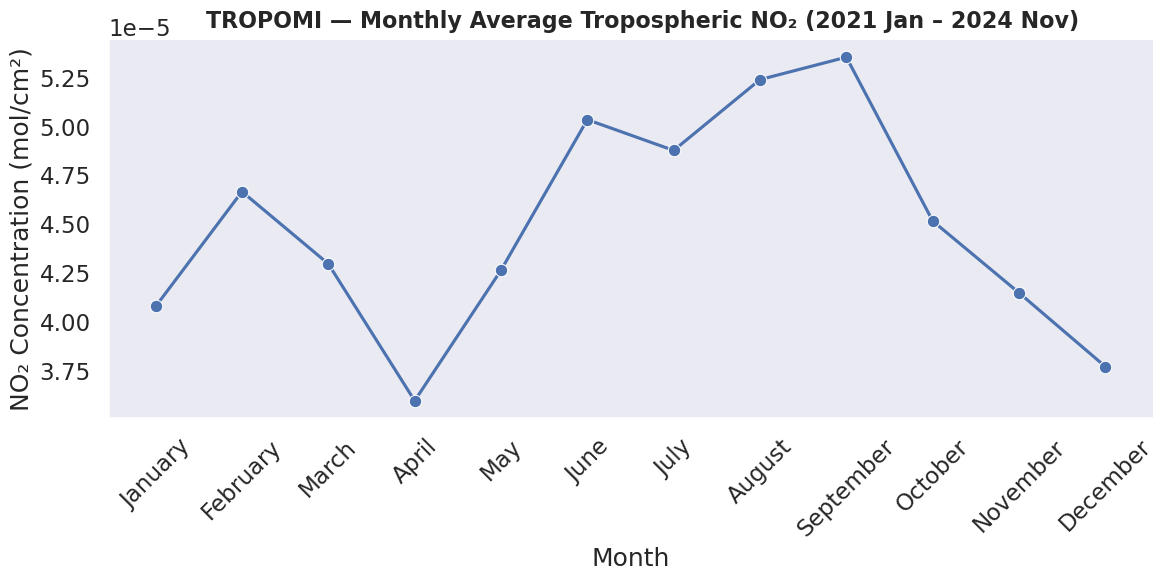

In [39]:
# Extract month number
df_graph["Month"] = df_graph["time"].dt.month

# Group by month and calculate average NO2
monthly_avg = df_graph.groupby("Month")[["tropospheric_NO2_column_number_density"]].mean().reset_index()

# Convert month numbers to month names
monthly_avg["Month"] = monthly_avg["Month"].apply(lambda x: calendar.month_name[int(x)])

# Ensure months appear in correct order
month_order = list(calendar.month_name)[1:] 
monthly_avg["Month"] = pd.Categorical(monthly_avg["Month"], categories=month_order, ordered=True)

# Rename for plotting
monthly_avg = monthly_avg.rename(columns={"tropospheric_NO2_column_number_density": "Concentration"})
monthly_avg["Pollutant"] = "Tropospheric NO₂"

# Plotting without legend
sns.set_style("dark")
sns.set_context("talk")

g = sns.relplot(
    data=monthly_avg,
    x="Month",
    y="Concentration",
    kind="line",
    aspect=2,
    height=6,
    marker="o",
    palette="bright",
    legend=False 
)

g.set_axis_labels("Month", "NO₂ Concentration (mol/cm²)")
g.set_xticklabels(rotation=45)
g.fig.suptitle("TROPOMI — Monthly Average Tropospheric NO₂ (2021 Jan – 2024 Nov)", fontsize=16, fontweight='bold', x=0.55)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [40]:
# Create a new DataFrame called df_missing
df_missing = df_sat.copy()

# Modify the new DataFrame to set 'data_available' as 1 if data exists, else 0
df_missing["data_available"] = df_missing["tropospheric_NO2_column_number_density"].notna().astype(int)

# Optional: Check the updated df_missing DataFrame
print(df_missing[["time", "tropospheric_NO2_column_number_density", "data_available"]].head())

        time  tropospheric_NO2_column_number_density  data_available
0 2021-01-01                                     NaN               0
1 2021-01-02                                0.000028               1
2 2021-01-03                                     NaN               0
3 2021-01-04                                0.000051               1
4 2021-01-05                                0.000050               1


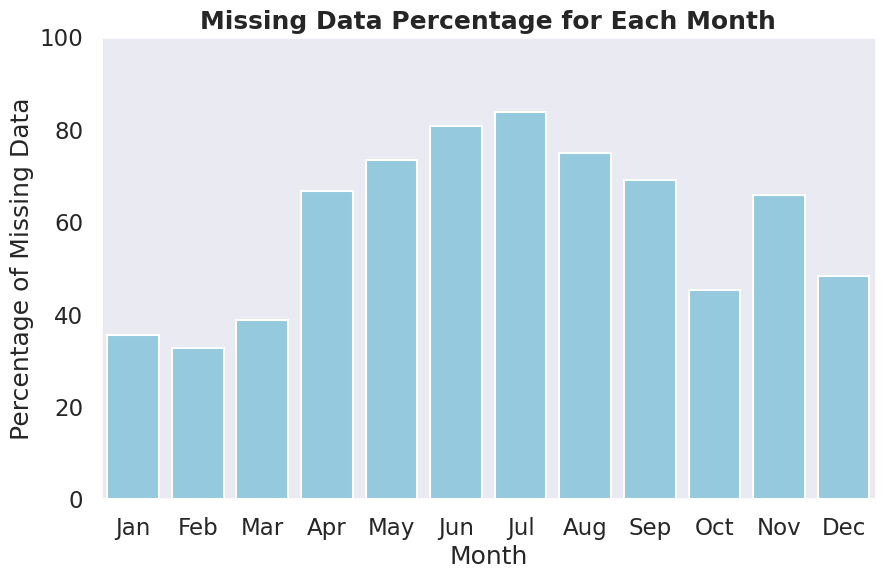

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_missing is already loaded and the time column is in datetime format
df_missing['time'] = pd.to_datetime(df_missing['time'])

# Extract month from the time column
df_missing['Month'] = df_missing['time'].dt.month

# Calculate the missing data percentage for each month
missing_percentage_per_month = df_missing.groupby('Month')['tropospheric_NO2_column_number_density'].apply(lambda x: x.isna().mean() * 100)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage_per_month.index, y=missing_percentage_per_month.values, color="skyblue")

# Customize the plot
plt.xlabel("Month")
plt.ylabel("Percentage of Missing Data")
plt.title("Missing Data Percentage for Each Month", fontweight='bold')
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.ylim(0, 100)
plt.show()

/tmp/ipykernel_93772/944786595.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



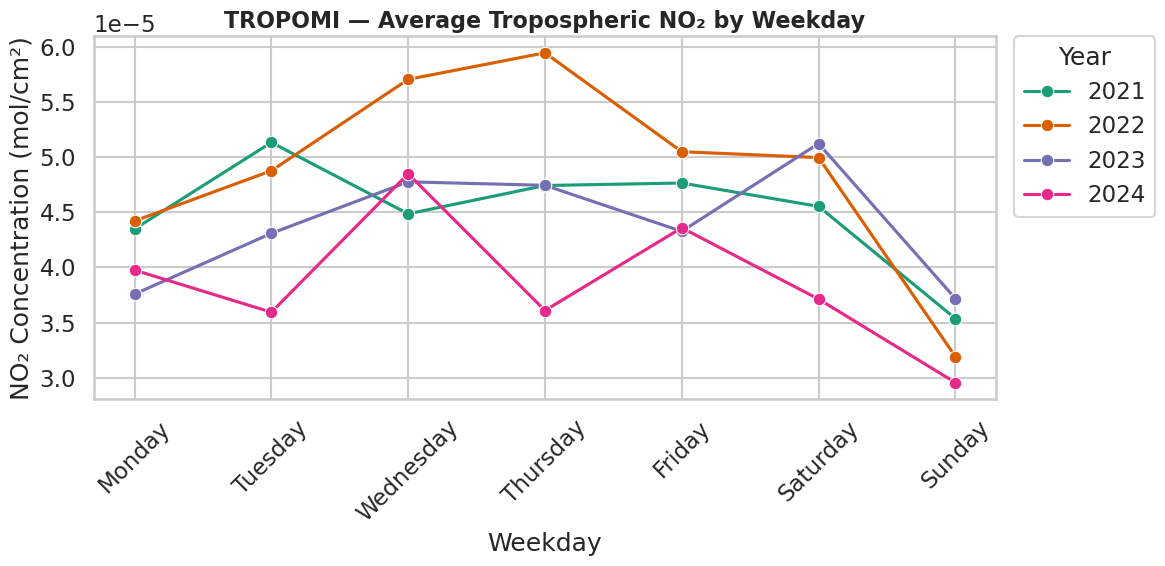

In [42]:
# Create Weekday and Year columns
df_sat["Weekday"] = df_sat["time"].dt.day_name()
df_sat["Year"] = df_sat["time"].dt.year

# Order weekdays: Monday to Sunday
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_sat["Weekday"] = pd.Categorical(df_sat["Weekday"], categories=weekday_order, ordered=True)

# Group by Weekday and Year to calculate average NO₂
weekday_no2 = df_sat.groupby(["Weekday", "Year"])["tropospheric_NO2_column_number_density"].mean().reset_index()

# Plot
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(12, 6))
plot = sns.lineplot(
    data=weekday_no2,
    x="Weekday", 
    y="tropospheric_NO2_column_number_density",
    hue="Year", 
    marker="o", 
    palette="Dark2"
)

plt.title("TROPOMI — Average Tropospheric NO₂ by Weekday", fontsize=16, fontweight="bold")
plt.xlabel("Weekday")
plt.ylabel("NO₂ Concentration (mol/cm²)")
plt.xticks(rotation=45)

# Move legend outside
plt.legend(title="Year", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

plt.tight_layout()
plt.show()

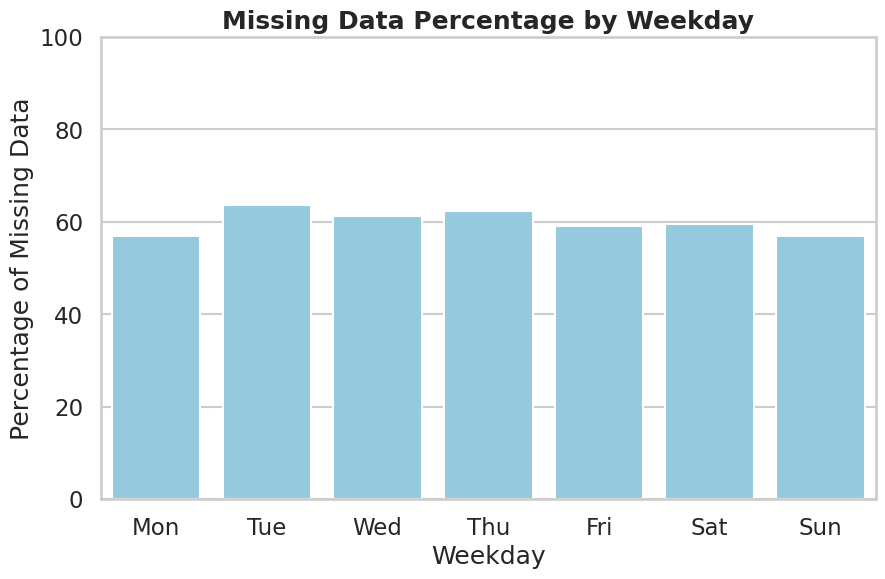

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_missing is already loaded and the time column is in datetime format
df_missing['time'] = pd.to_datetime(df_missing['time'])

# Extract the weekday from the time column (0=Monday, 6=Sunday)
df_missing['Weekday'] = df_missing['time'].dt.weekday

# Calculate the missing data percentage for each weekday
missing_percentage_by_weekday = df_missing.groupby('Weekday')['tropospheric_NO2_column_number_density'].apply(lambda x: x.isna().mean() * 100)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage_by_weekday.index, y=missing_percentage_by_weekday.values, color="skyblue")

# Customize the plot
plt.xlabel("Weekday")
plt.ylabel("Percentage of Missing Data")
plt.title("Missing Data Percentage by Weekday", fontweight='bold')
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.ylim(0, 100)
plt.show()

In [44]:
import plotly.graph_objects as go
# --- Your preprocessing ---
df_sat["time"] = pd.to_datetime(df_sat["time"])
df_sat = df_sat.dropna(subset=["tropospheric_NO2_column_number_density"])
df_sat["YearMonth"] = df_sat["time"].dt.to_period("M").dt.to_timestamp()
df_monthly = df_sat.groupby("YearMonth")[["tropospheric_NO2_column_number_density"]].mean().reset_index()
df_monthly = df_monthly.rename(columns={"tropospheric_NO2_column_number_density": "Concentration"})
df_monthly["Pollutant"] = "NO₂"

# Create numeric time variable for trend line 
df_monthly["MonthIndex"] = (df_monthly["YearMonth"] - df_monthly["YearMonth"].min()).dt.days

# Fit linear trend
coeffs = np.polyfit(df_monthly["MonthIndex"], df_monthly["Concentration"], deg=1)
df_monthly["Trend"] = np.polyval(coeffs, df_monthly["MonthIndex"])

# Create figure with both original line and trend line 
fig = go.Figure()

# Original NO₂ line
fig.add_trace(go.Scatter(
    x=df_monthly["YearMonth"],
    y=df_monthly["Concentration"],
    mode="lines+markers",
    name="Tropospheric NO₂",
    line=dict(color="red")
))

# Trend line
fig.add_trace(go.Scatter(
    x=df_monthly["YearMonth"],
    y=df_monthly["Trend"],
    mode="lines",
    name="Trend Line",
    line=dict(color="darkgreen", dash="dash",width=4)
))

# Layout settings
fig.update_layout(
    title="TROPOMI — Monthly Average NO₂ in Nairobi, Kenya (January 2021 – November 2024)",
    xaxis_title="Month",
    yaxis_title="Concentration (mol/cm²)",
    template="plotly_white",
    height=600,
    xaxis=dict(showgrid=True, tickformat='%b %Y'),
    yaxis=dict(showgrid=True),
    hovermode="x unified"
)

fig.show()

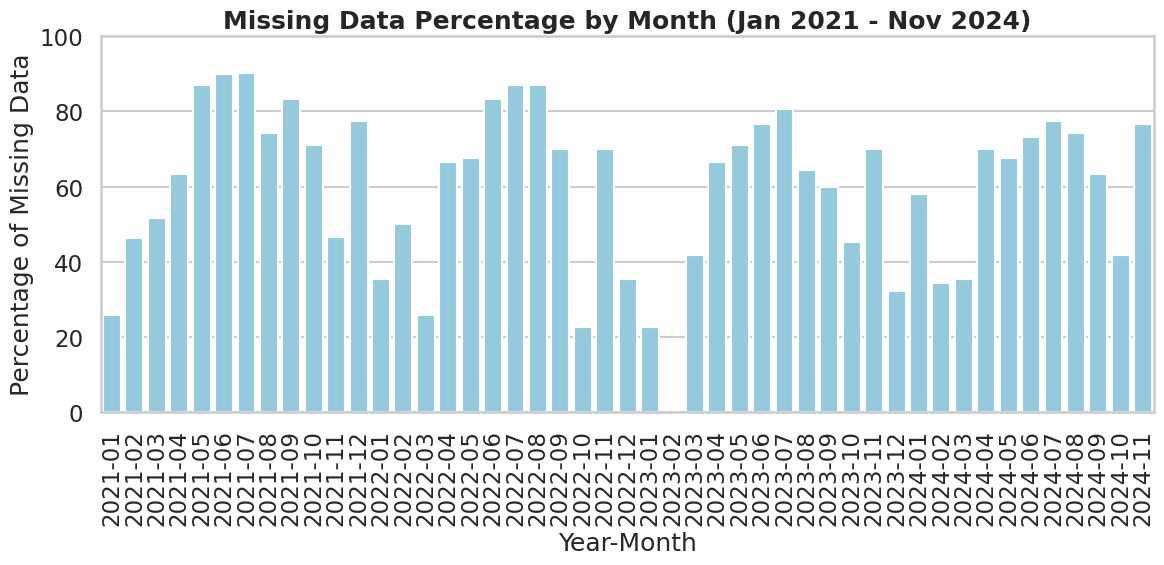

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_missing is already loaded and the time column is in datetime format
df_missing['time'] = pd.to_datetime(df_missing['time'])

# Extract year and month from the time column
df_missing['YearMonth'] = df_missing['time'].dt.to_period('M')

# Calculate the missing data percentage for each YearMonth
missing_percentage_per_month = df_missing.groupby('YearMonth')['tropospheric_NO2_column_number_density'].apply(
    lambda x: x.isna().mean() * 100
)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage_per_month.index.astype(str), y=missing_percentage_per_month.values, color="skyblue")

# Customize the plot
plt.xlabel("Year-Month")
plt.ylabel("Percentage of Missing Data")
plt.title("Missing Data Percentage by Month (Jan 2021 - Nov 2024)", fontweight='bold')
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [46]:
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
# --- Your preprocessing ---
df_sat["time"] = pd.to_datetime(df_sat["time"])
df_sat = df_sat.dropna(subset=["tropospheric_NO2_column_number_density"])
df_sat["Year"] = df_sat["time"].dt.year
df_sat["Month"] = df_sat["time"].dt.month

monthly_summary = df_sat.groupby(['Year', 'Month'])["tropospheric_NO2_column_number_density"].mean().reset_index()
monthly_summary["YearMonth"] = pd.to_datetime(monthly_summary[['Year', 'Month']].assign(DAY=1))
monthly_summary = monthly_summary.rename(columns={"tropospheric_NO2_column_number_density": "Concentration"})
monthly_summary["Pollutant"] = "Tropospheric NO₂"

# Linear regression
monthly_summary["timestamp"] = monthly_summary["YearMonth"].map(pd.Timestamp.toordinal)
X = monthly_summary["timestamp"].values.reshape(-1, 1)
y = monthly_summary["Concentration"].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Bar chart
fig = px.bar(
    monthly_summary,
    x='YearMonth',
    y='Concentration',
    color='Pollutant',
    color_discrete_map={'Tropospheric NO₂': '#00ffff'},
    title='TROPOMI — Monthly Mean Tropospheric NO₂ in Nairobi, Kenya (January 2021 – November 2024)',
    labels={'YearMonth': 'Month', 'Concentration': 'Mean Concentration (mol/m²)'},
    height=600
)

# Add dashed dark green trendline
fig.add_trace(
    go.Scatter(
        x=monthly_summary["YearMonth"],
        y=y_pred,
        mode='lines',
        name='Linear Trend',
        line=dict(color='darkgreen', width=4, dash='dash')
    )
)

# Layout customization
fig.update_layout(
    barmode='stack',
    template='plotly_white',
    xaxis=dict(
        title='Month',
        tickformat='%b\n%Y',
        showgrid=True
    ),
    yaxis=dict(
        title='Concentration (mol/cm²)',
        showgrid=True
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    showlegend=True  # Keep legend on
)

fig.show()

In [47]:
# Clean scatter_df for creating Scatter Plots
scatter_df

Date  Year  Month  Day  Hour     NO_ppb    NO2_ppb  \
0       2021-01-14 05:00:00  2021      1   14     5  15.168343  34.974838   
1       2021-01-14 05:00:00  2021      1   14     5   5.453504  11.882874   
2       2021-01-14 05:00:00  2021      1   14     5   2.351893  14.811316   
3       2021-01-14 05:00:00  2021      1   14     5  15.131422  26.287502   
4       2021-01-14 05:00:00  2021      1   14     5  39.061401  33.478600   
...                     ...   ...    ...  ...   ...        ...        ...   
1470420 2025-06-30 23:00:00  2025      6   30    23   3.425523   2.460115   
1470421 2025-06-30 23:00:00  2025      6   30    23   6.782421   2.444969   
1470422 2025-06-30 23:00:00  2025      6   30    23   7.314733   2.969796   
1470423 2025-06-30 23:00:00  2025      6   30    23   3.542480   2.890490   
1470424 2025-06-30 23:00:00  2025      6   30    23   3.508768   2.636224   

           NOx_ppb    DayDate  
0        50.143181 2021-01-14  
1        17.336376 2021-01-14  
2        17.163208 2021-01-14  
3        41.418922 2021-01-14  
4        72.540001 2021-01-14  
...            ...        ...  
1470420   5.885639 2025-06-30  
1470421   9.227390 2025-06-30  
1470422  10.284528 2025-06-30  
1470423   6.432971 2025-06-30  
1470424   6.144991 2025-06-30  

[916764 rows x 9 columns]

In [48]:
# Change df name
df = scatter_df
df.head()

Date  Year  Month  Day  Hour     NO_ppb    NO2_ppb  \
0 2021-01-14 05:00:00  2021      1   14     5  15.168343  34.974838   
1 2021-01-14 05:00:00  2021      1   14     5   5.453504  11.882874   
2 2021-01-14 05:00:00  2021      1   14     5   2.351893  14.811316   
3 2021-01-14 05:00:00  2021      1   14     5  15.131422  26.287502   
4 2021-01-14 05:00:00  2021      1   14     5  39.061401  33.478600   

     NOx_ppb    DayDate  
0  50.143181 2021-01-14  
1  17.336376 2021-01-14  
2  17.163208 2021-01-14  
3  41.418922 2021-01-14  
4  72.540001 2021-01-14

In [49]:
import pandas as pd

# Convert 'Date' to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract hour and day
df['Hour'] = df['Date'].dt.hour
df['DayDate'] = df['Date'].dt.floor('d')  # or df['Date'].dt.date if you prefer just date format

# Filter for 1 PM (13) and 2 PM (14) only
df_filtered = df[df['Hour'].isin([13, 14])]

# Group by day and calculate the mean for those two hours
daily_1_2pm_avg = df_filtered.groupby('DayDate')[['NO_ppb', 'NO2_ppb', 'NOx_ppb']].mean().reset_index()

# Rename df to new filtered one if needed
df = daily_1_2pm_avg

# Preview
print(df.head())

     DayDate     NO_ppb    NO2_ppb    NOx_ppb
0 2021-02-02  37.530718  26.742870  64.273588
1 2021-02-05  29.005099  23.147637  52.152735
2 2021-02-06  16.872779  19.955868  36.828647
3 2021-02-07  31.070042  26.344980  57.415022
4 2021-02-12  24.416689  24.669727  49.086416


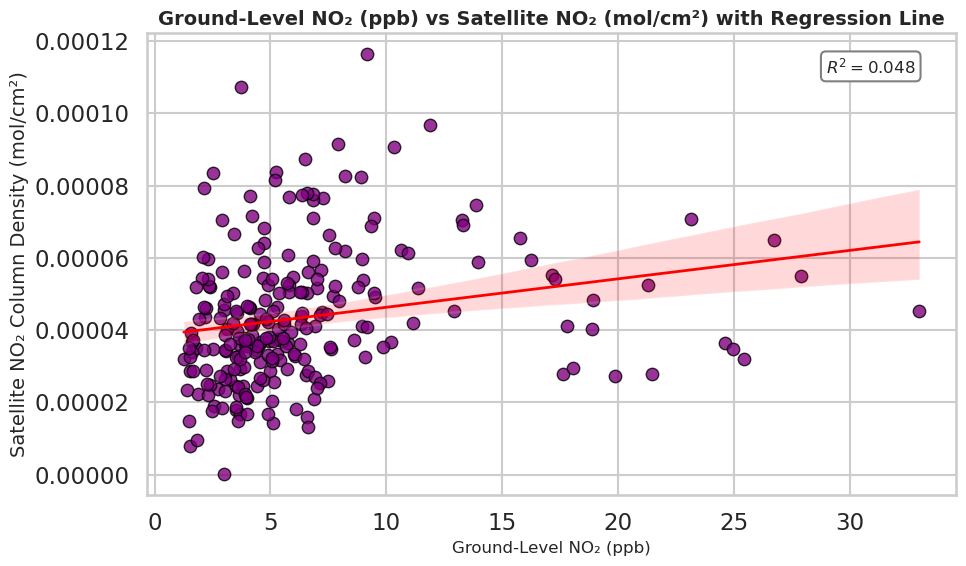

In [50]:
from sklearn.metrics import r2_score

# --- Step 1: Convert dates ---
df['DayDate'] = pd.to_datetime(df['DayDate'])
df_sat['time'] = pd.to_datetime(df_sat['time'])

# --- Step 2: Prepare for merging ---
df_renamed = df[['DayDate', 'NO2_ppb']].rename(columns={
    'DayDate': 'date',
    'NO2_ppb': 'Ground_NO2_ppb'
})
df_sat_renamed = df_sat.rename(columns={
    'time': 'date',
    'tropospheric_NO2_column_number_density': 'Satellite_NO2'
})

# --- Step 3: Merge datasets ---
merged_df = pd.merge(df_renamed, df_sat_renamed, on='date', how='inner')
merged_df = merged_df.dropna(subset=['Ground_NO2_ppb', 'Satellite_NO2'])

# --- Calculate R² ---
X = merged_df['Ground_NO2_ppb']
y = merged_df['Satellite_NO2']
coeffs = np.polyfit(X, y, 1)
y_pred = np.polyval(coeffs, X)
r2 = r2_score(y, y_pred)

# --- Step 4: Plot with regression line ---
plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged_df,
    x='Ground_NO2_ppb',
    y='Satellite_NO2',
    scatter_kws={'color': 'purple', 's': 80, 'edgecolor': 'black'},
    line_kws={'color': 'red', 'linewidth': 2},
)

plt.title('Ground-Level NO₂ (ppb) vs Satellite NO₂ (mol/cm²) with Regression Line', fontsize=14, fontweight='bold')
plt.xlabel('Ground-Level NO₂ (ppb)', fontsize=12)
plt.ylabel('Satellite NO₂ Column Density (mol/cm²)', fontsize=14)
plt.grid(True)

# --- Add R² text in top right corner ---
plt.text(
    0.95, 0.95,
    f'$R^2 = {r2:.3f}$',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white')
)

plt.tight_layout()
plt.show()

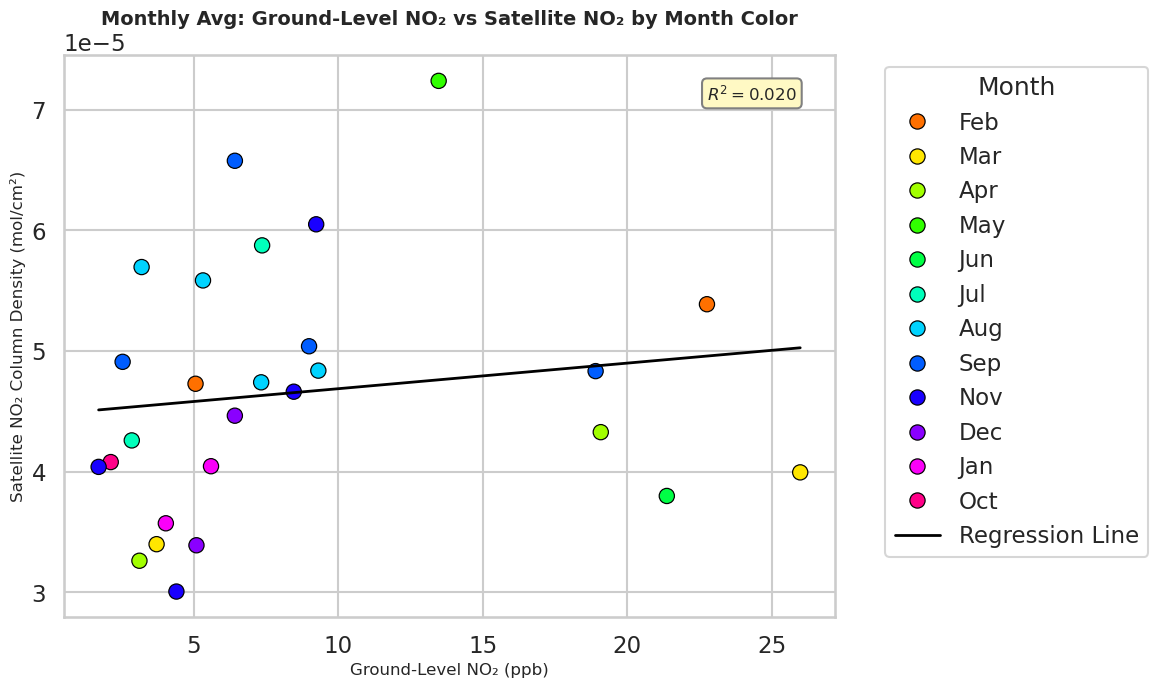

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import calendar

# Convert dates 
df['DayDate'] = pd.to_datetime(df['DayDate'])
df_sat['time'] = pd.to_datetime(df_sat['time'])

# Prepare for merging
df_renamed = df[['DayDate', 'NO2_ppb']].rename(columns={
    'DayDate': 'date',
    'NO2_ppb': 'Ground_NO2_ppb'
})
df_sat_renamed = df_sat.rename(columns={
    'time': 'date',
    'tropospheric_NO2_column_number_density': 'Satellite_NO2'
})

# Merge datasets
merged_df = pd.merge(df_renamed, df_sat_renamed, on='date', how='inner')
merged_df = merged_df.dropna(subset=['Ground_NO2_ppb', 'Satellite_NO2'])

# Convert to monthly and average 
merged_df['YearMonth'] = merged_df['date'].dt.to_period('M')
monthly_avg = merged_df.groupby('YearMonth')[['Ground_NO2_ppb', 'Satellite_NO2']].mean().reset_index()
monthly_avg['YearMonth'] = monthly_avg['YearMonth'].dt.to_timestamp()
monthly_avg['Month'] = monthly_avg['YearMonth'].dt.month
monthly_avg['MonthName'] = monthly_avg['Month'].apply(lambda x: calendar.month_abbr[x])  # Jan, Feb, ...

# Calculate R² 
X = monthly_avg['Ground_NO2_ppb']
y = monthly_avg['Satellite_NO2']
coeffs = np.polyfit(X, y, 1)
y_pred = np.polyval(coeffs, X)
r2 = r2_score(y, y_pred)

# Plot with month-based colors 
plt.figure(figsize=(12, 7))
palette = sns.color_palette("hsv", 12)  # 12 distinct colors for months

# Scatterplot with month colors
sns.scatterplot(
    data=monthly_avg,
    x='Ground_NO2_ppb',
    y='Satellite_NO2',
    hue='MonthName',
    palette=palette,
    s=120,
    edgecolor='black'
)

# Add regression line
x_vals = np.linspace(X.min(), X.max(), 100)
y_vals = np.polyval(coeffs, x_vals)
plt.plot(x_vals, y_vals, color='black', linewidth=2, label='Regression Line')

# --- Labels, title, legend, R² ---
plt.title('Monthly Avg: Ground-Level NO₂ vs Satellite NO₂ by Month Color', fontsize=14, fontweight='bold')
plt.xlabel('Ground-Level NO₂ (ppb)', fontsize=12)
plt.ylabel('Satellite NO₂ Column Density (mol/cm²)', fontsize=12)
plt.grid(True)

# R² box
plt.text(
    0.95, 0.95,
    f'$R^2 = {r2:.3f}$',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='#fff9c4')
)

plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [52]:
print(f"stats:'monthly_avg.iloc[0:15,0:15]'")

stats:'monthly_avg.iloc[0:15,0:15]'


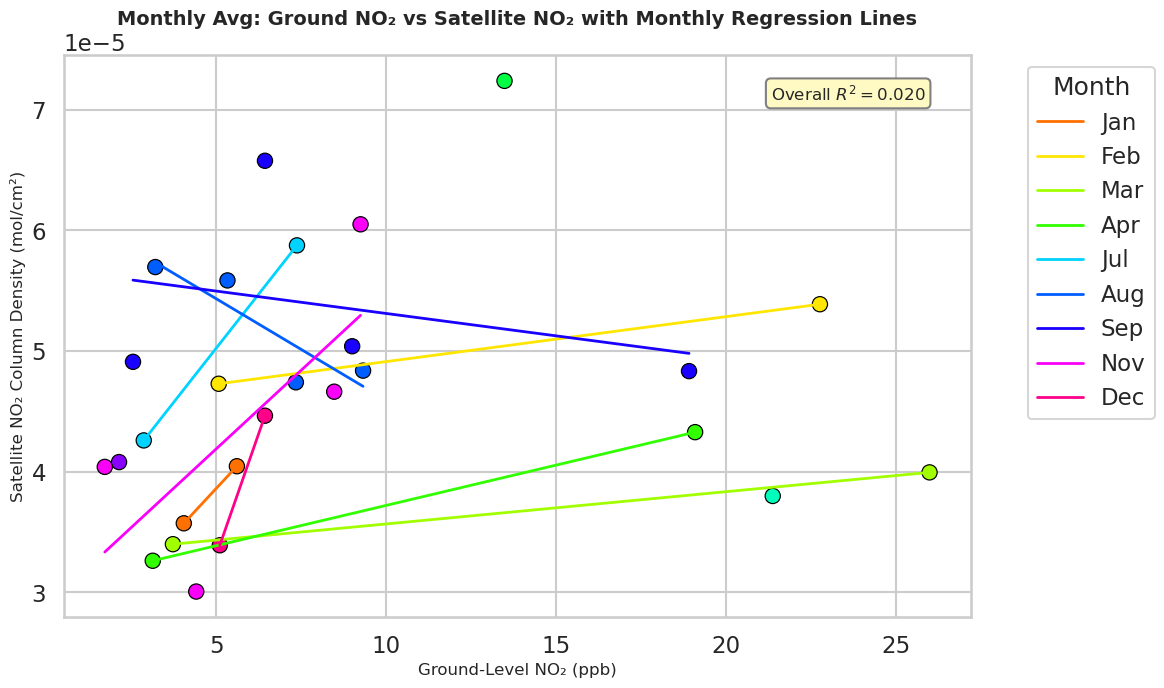

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import calendar

# Convert dates ---
df['DayDate'] = pd.to_datetime(df['DayDate'])
df_sat['time'] = pd.to_datetime(df_sat['time'])

# Prepare for merging ---
df_renamed = df[['DayDate', 'NO2_ppb']].rename(columns={
    'DayDate': 'date',
    'NO2_ppb': 'Ground_NO2_ppb'
})
df_sat_renamed = df_sat.rename(columns={
    'time': 'date',
    'tropospheric_NO2_column_number_density': 'Satellite_NO2'
})

# Merge datasets ---
merged_df = pd.merge(df_renamed, df_sat_renamed, on='date', how='inner')
merged_df = merged_df.dropna(subset=['Ground_NO2_ppb', 'Satellite_NO2'])

# Convert to monthly and average ---
merged_df['YearMonth'] = merged_df['date'].dt.to_period('M')
monthly_avg = merged_df.groupby('YearMonth')[['Ground_NO2_ppb', 'Satellite_NO2']].mean().reset_index()
monthly_avg['YearMonth'] = monthly_avg['YearMonth'].dt.to_timestamp()
monthly_avg['Month'] = monthly_avg['YearMonth'].dt.month
monthly_avg['MonthName'] = monthly_avg['Month'].apply(lambda x: calendar.month_abbr[x])  # Jan, Feb, ...

# R² over all points (optional global model) ---
X = monthly_avg['Ground_NO2_ppb']
y = monthly_avg['Satellite_NO2']
coeffs = np.polyfit(X, y, 1)
y_pred = np.polyval(coeffs, X)
r2 = r2_score(y, y_pred)

# Plot with regression lines by month ---
plt.figure(figsize=(12, 7))
palette = sns.color_palette("hsv", 12)  # 12 colors for 12 months
month_order = sorted(monthly_avg['MonthName'].unique(), key=lambda m: list(calendar.month_abbr).index(m))
month_to_color = dict(zip(month_order, palette))

# Plot scatter points
sns.scatterplot(
    data=monthly_avg,
    x='Ground_NO2_ppb',
    y='Satellite_NO2',
    hue='MonthName',
    palette=month_to_color,
    s=120,
    edgecolor='black',
    legend=False  # We'll create a custom one
)

# Plot monthly regression lines
for month, color in month_to_color.items():
    subset = monthly_avg[monthly_avg['MonthName'] == month]
    if len(subset) < 2:
        continue  # Skip months with insufficient data for regression
    x_vals = subset['Ground_NO2_ppb']
    y_vals = subset['Satellite_NO2']
    coeffs = np.polyfit(x_vals, y_vals, 1)
    x_range = np.linspace(x_vals.min(), x_vals.max(), 100)
    y_pred = np.polyval(coeffs, x_range)
    plt.plot(x_range, y_pred, color=color, linewidth=2, label=month)

# Labels, title, R²
plt.title('Monthly Avg: Ground NO₂ vs Satellite NO₂ with Monthly Regression Lines', fontsize=14, fontweight='bold')
plt.xlabel('Ground-Level NO₂ (ppb)', fontsize=12)
plt.ylabel('Satellite NO₂ Column Density (mol/cm²)', fontsize=12)
plt.grid(True)

# Global R² box
plt.text(
    0.95, 0.95,
    f'Overall $R^2 = {r2:.3f}$',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='#fff9c4')
)

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates
plt.legend(by_label.values(), by_label.keys(), title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

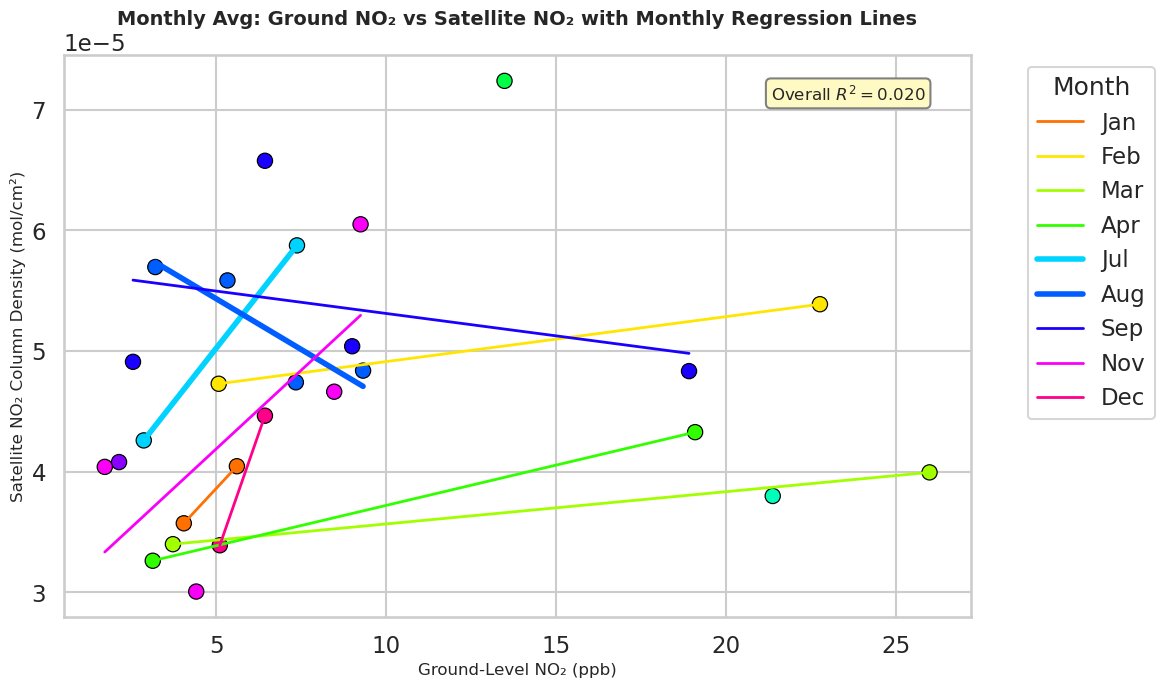

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import calendar

# Convert dates 
df['DayDate'] = pd.to_datetime(df['DayDate'])
df_sat['time'] = pd.to_datetime(df_sat['time'])

# Prepare for merging 
df_renamed = df[['DayDate', 'NO2_ppb']].rename(columns={
    'DayDate': 'date',
    'NO2_ppb': 'Ground_NO2_ppb'
})
df_sat_renamed = df_sat.rename(columns={
    'time': 'date',
    'tropospheric_NO2_column_number_density': 'Satellite_NO2'
})

# Merge datasets
merged_df = pd.merge(df_renamed, df_sat_renamed, on='date', how='inner')
merged_df = merged_df.dropna(subset=['Ground_NO2_ppb', 'Satellite_NO2'])

# Convert to monthly and average 
merged_df['YearMonth'] = merged_df['date'].dt.to_period('M')
monthly_avg = merged_df.groupby('YearMonth')[['Ground_NO2_ppb', 'Satellite_NO2']].mean().reset_index()
monthly_avg['YearMonth'] = monthly_avg['YearMonth'].dt.to_timestamp()
monthly_avg['Month'] = monthly_avg['YearMonth'].dt.month
monthly_avg['MonthName'] = monthly_avg['Month'].apply(lambda x: calendar.month_abbr[x])  # Jan, Feb, ...

# R² over all monthly-averaged points 
X = monthly_avg['Ground_NO2_ppb']
y = monthly_avg['Satellite_NO2']
coeffs = np.polyfit(X, y, 1)
y_pred = np.polyval(coeffs, X)
r2 = r2_score(y, y_pred)

# Plot
plt.figure(figsize=(12, 7))
palette = sns.color_palette("hsv", 12)  # 12 distinct colors for months
month_order = sorted(monthly_avg['MonthName'].unique(), key=lambda m: list(calendar.month_abbr).index(m))
month_to_color = dict(zip(month_order, palette))

# Scatter points by month
sns.scatterplot(
    data=monthly_avg,
    x='Ground_NO2_ppb',
    y='Satellite_NO2',
    hue='MonthName',
    palette=month_to_color,
    s=120,
    edgecolor='black',
    legend=False  # we'll customize legend later
)

# Plot month-specific regression lines
for month, color in month_to_color.items():
    subset = monthly_avg[monthly_avg['MonthName'] == month]
    if len(subset) < 2:
        continue
    x_vals = subset['Ground_NO2_ppb']
    y_vals = subset['Satellite_NO2']
    coeffs = np.polyfit(x_vals, y_vals, 1)
    x_range = np.linspace(x_vals.min(), x_vals.max(), 100)
    y_pred = np.polyval(coeffs, x_range)

    # Thicker lines for summer months
    lw = 4 if month in ['Jun', 'Jul', 'Aug'] else 2
    plt.plot(x_range, y_pred, color=color, linewidth=lw, label=month)

# Titles, labels, R² box
plt.title('Monthly Avg: Ground NO₂ vs Satellite NO₂ with Monthly Regression Lines', fontsize=14, fontweight='bold')
plt.xlabel('Ground-Level NO₂ (ppb)', fontsize=12)
plt.ylabel('Satellite NO₂ Column Density (mol/cm²)', fontsize=12)
plt.grid(True)

plt.text(
    0.95, 0.95,
    f'Overall $R^2 = {r2:.3f}$',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='#fff9c4')
)

# Custom legend 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # remove duplicates
plt.legend(by_label.values(), by_label.keys(), title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

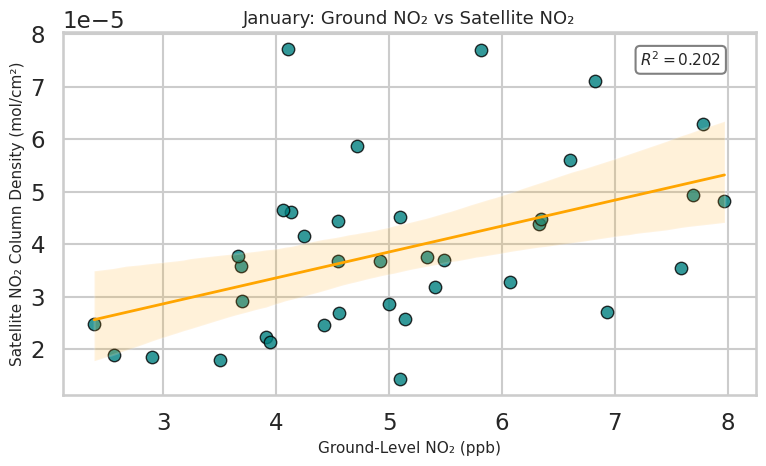

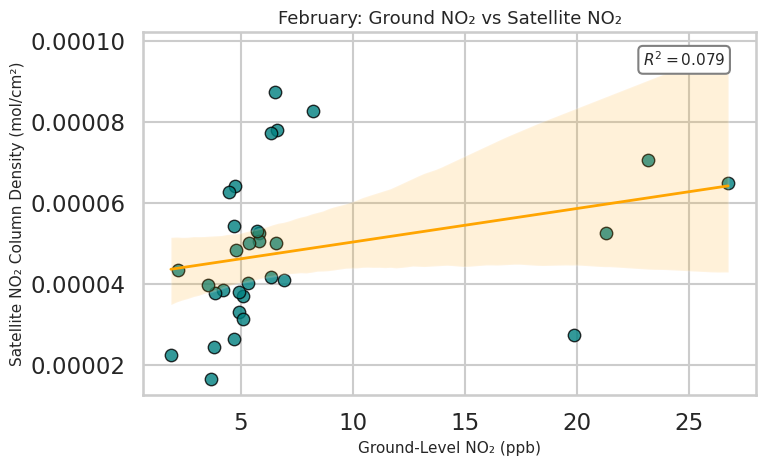

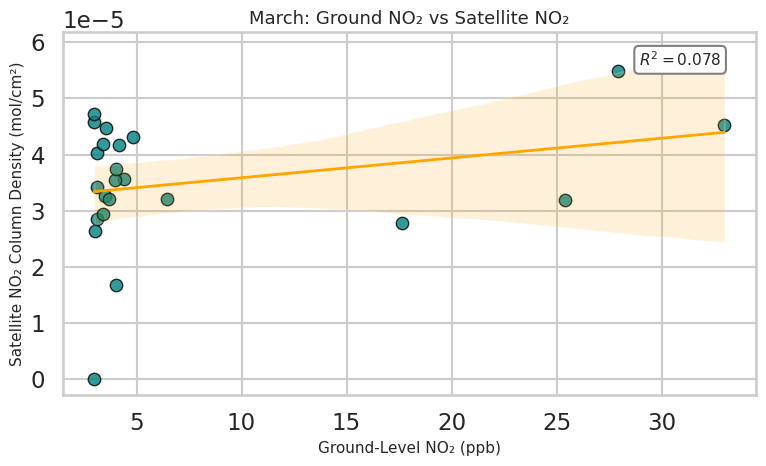

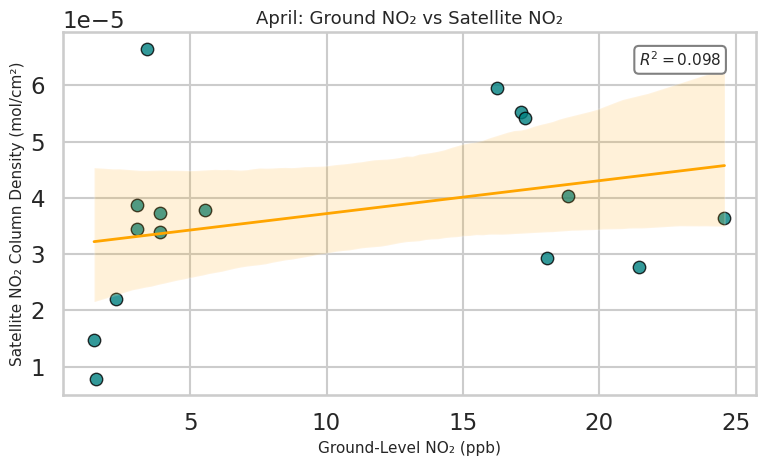

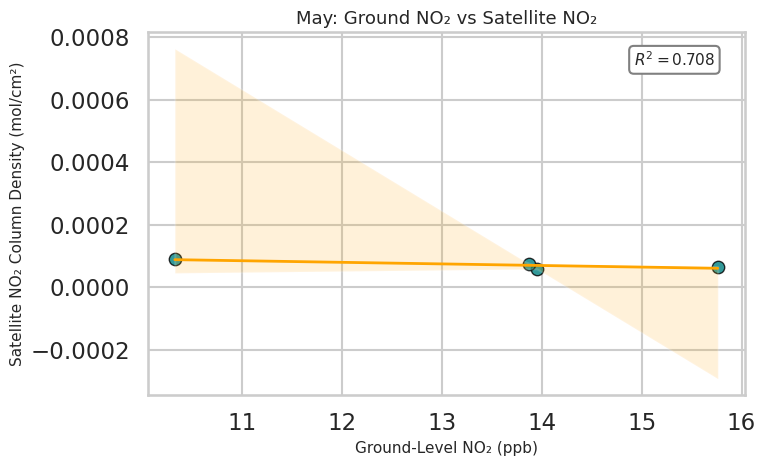

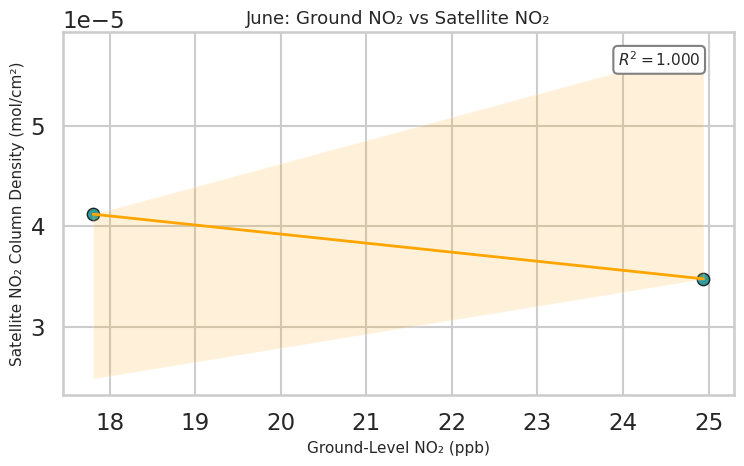

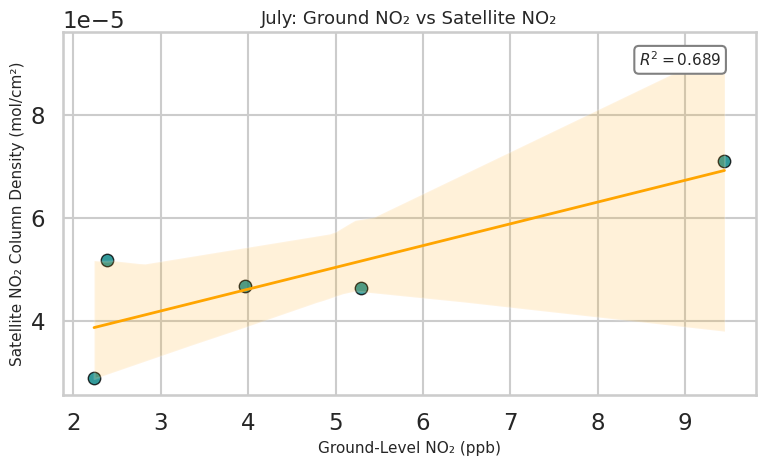

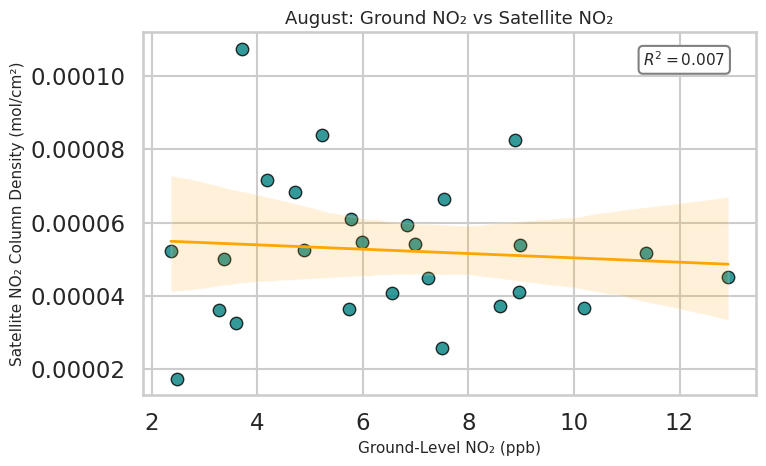

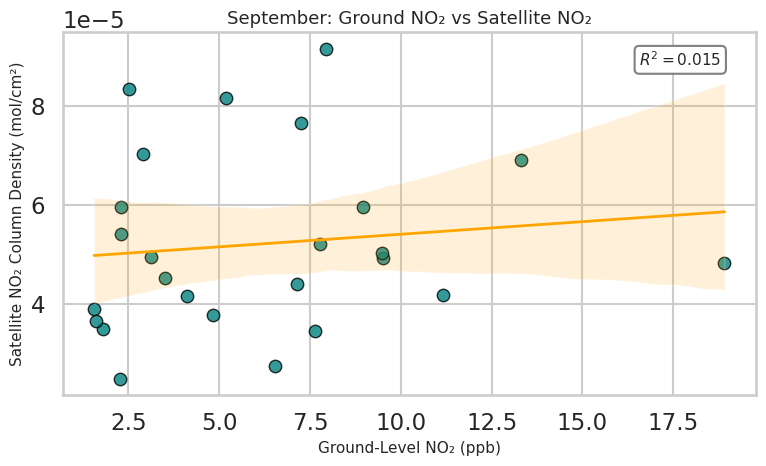

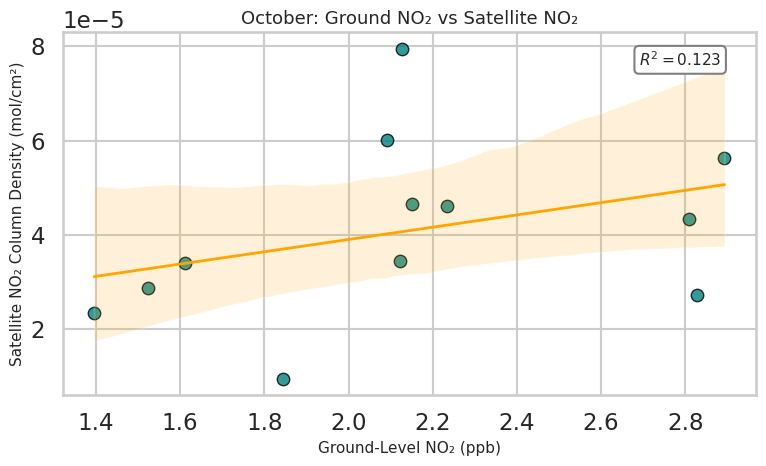

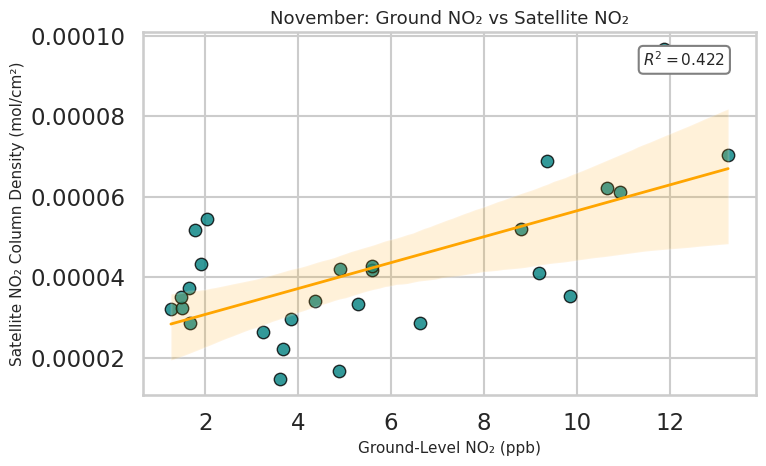

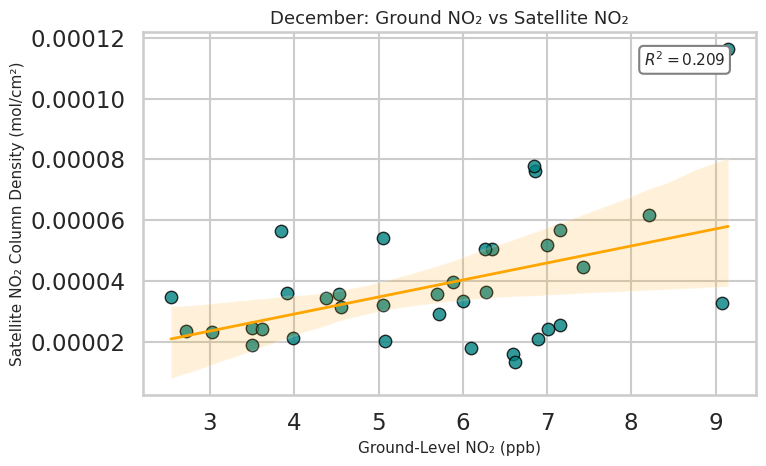

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import calendar

# Convert dates 
df['DayDate'] = pd.to_datetime(df['DayDate'])
df_sat['time'] = pd.to_datetime(df_sat['time'])

# Prepare for merging 
df_renamed = df[['DayDate', 'NO2_ppb']].rename(columns={
    'DayDate': 'date',
    'NO2_ppb': 'Ground_NO2_ppb'
})
df_sat_renamed = df_sat.rename(columns={
    'time': 'date',
    'tropospheric_NO2_column_number_density': 'Satellite_NO2'
})

# Merge datasets 
merged_df = pd.merge(df_renamed, df_sat_renamed, on='date', how='inner')
merged_df = merged_df.dropna(subset=['Ground_NO2_ppb', 'Satellite_NO2'])

# Extract month name 
merged_df['Month'] = merged_df['date'].dt.month
merged_df['MonthName'] = merged_df['Month'].apply(lambda x: calendar.month_abbr[x])  # Jan, Feb, ...

# Plot for each month 
for month in range(1, 13):
    month_data = merged_df[merged_df['Month'] == month]
    
    if len(month_data) < 2:
        continue  
    
    X = month_data['Ground_NO2_ppb']
    y = month_data['Satellite_NO2']
    coeffs = np.polyfit(X, y, 1)
    y_pred = np.polyval(coeffs, X)
    r2 = r2_score(y, y_pred)

    plt.figure(figsize=(8, 5))
    sns.regplot(
        data=month_data,
        x='Ground_NO2_ppb',
        y='Satellite_NO2',
        scatter_kws={'color': 'teal', 's': 80, 'edgecolor': 'black'},
        line_kws={'color': 'orange', 'linewidth': 2}
    )

    plt.title(f'{calendar.month_name[month]}: Ground NO₂ vs Satellite NO₂', fontsize=13)
    plt.xlabel('Ground-Level NO₂ (ppb)', fontsize=11)
    plt.ylabel('Satellite NO₂ Column Density (mol/cm²)', fontsize=11)
    plt.grid(True)

    # Add R² box
    plt.text(
        0.95, 0.95,
        f'$R^2 = {r2:.3f}$',
        transform=plt.gca().transAxes,
        fontsize=11,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white')
    )

    plt.tight_layout()
    plt.show()

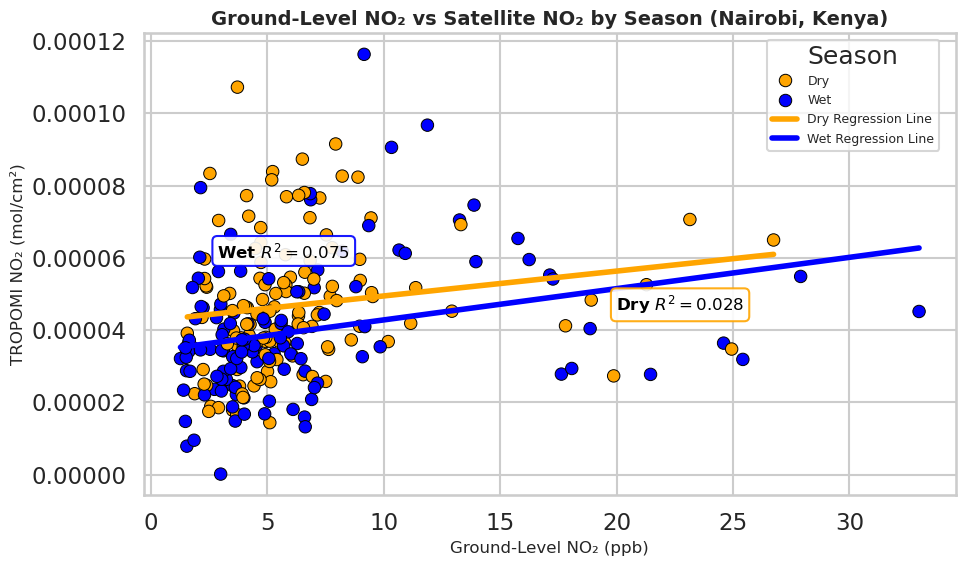

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Prepare merged_df (same as before)
df_renamed = df[['DayDate', 'NO2_ppb']].rename(columns={
    'DayDate': 'date',
    'NO2_ppb': 'Ground_NO2_ppb'
})
df_sat_renamed = df_sat.rename(columns={
    'time': 'date',
    'tropospheric_NO2_column_number_density': 'Satellite_NO2'
})

merged_df = pd.merge(df_renamed, df_sat_renamed, on='date', how='inner')
merged_df = merged_df.dropna(subset=['Ground_NO2_ppb', 'Satellite_NO2'])

# Add Season label
def classify_season(date):
    month = date.month
    # march, april, may, october, november, december 
    if month in [3,4,5,10,11,12]:
        return 'Wet'
    else:
        return 'Dry'

merged_df['Season'] = merged_df['date'].apply(classify_season)

# Plot setup
plt.figure(figsize=(10, 6))
palette = {'Dry': 'orange', 'Wet': 'blue'}

# Scatter plot with colors by season
sns.scatterplot(
    data=merged_df,
    x='Ground_NO2_ppb',
    y='Satellite_NO2',
    hue='Season',
    palette=palette,
    s=80,
    edgecolor='black'
)

# For each season, fit line and plot with R² text
for season, color in palette.items():
    subset = merged_df[merged_df['Season'] == season]
    X = subset['Ground_NO2_ppb']
    y = subset['Satellite_NO2']
    
    # Fit line
    coeffs = np.polyfit(X, y, 1)
    y_pred = np.polyval(coeffs, X)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Plot regression line over the range of X for this season
    x_vals = np.linspace(X.min(), X.max(), 100)
    y_vals = np.polyval(coeffs, x_vals)
    plt.plot(x_vals, y_vals, color=color, linewidth=4, label=f'{season} Regression Line')
    
    # Position text: top left for Wet, bottom right for Dry (adjust as needed)
    if season == 'Wet':
        xpos = x_vals.min() + (x_vals.max() - x_vals.min()) * 0.05
        ypos = y_vals.max() - (y_vals.max() - y_vals.min()) * 0.1
        ha = 'left'
    else:  # Dry
        xpos = x_vals.max() - (x_vals.max() - x_vals.min()) * 0.05
        ypos = y_vals.min() + (y_vals.max() - y_vals.min()) * 0.1
        ha = 'right'
    
    plt.text(
        xpos, ypos,
        f'{season} $R^2 = {r2:.3f}$',
        color='black',
        fontsize=12,
        fontweight='bold',
        ha=ha,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=color, alpha=0.9)
    )

plt.title('Ground-Level NO₂ vs Satellite NO₂ by Season (Nairobi, Kenya)', fontsize=14,fontweight='bold')
plt.xlabel('Ground-Level NO₂ (ppb)', fontsize=12)
plt.ylabel('TROPOMI NO₂ (mol/cm²)', fontsize=12)
plt.grid(True)
plt.legend(title='Season', loc='upper left', fontsize=9, bbox_to_anchor=(0.76, 1))
plt.tight_layout()
plt.show()

In [57]:
# DF for density graph
box_df

Date  Year  Month  Day  Hour     NO_ppb    NO2_ppb  \
0       2021-01-14 05:00:00  2021      1   14     5  15.168343  34.974838   
1       2021-01-14 05:00:00  2021      1   14     5   5.453504  11.882874   
2       2021-01-14 05:00:00  2021      1   14     5   2.351893  14.811316   
3       2021-01-14 05:00:00  2021      1   14     5  15.131422  26.287502   
4       2021-01-14 05:00:00  2021      1   14     5  39.061401  33.478600   
...                     ...   ...    ...  ...   ...        ...        ...   
1470420 2025-06-30 23:00:00  2025      6   30    23   3.425523   2.460115   
1470421 2025-06-30 23:00:00  2025      6   30    23   6.782421   2.444969   
1470422 2025-06-30 23:00:00  2025      6   30    23   7.314733   2.969796   
1470423 2025-06-30 23:00:00  2025      6   30    23   3.542480   2.890490   
1470424 2025-06-30 23:00:00  2025      6   30    23   3.508768   2.636224   

           NOx_ppb    DayDate  
0        50.143181 2021-01-14  
1        17.336376 2021-01-14  
2        17.163208 2021-01-14  
3        41.418922 2021-01-14  
4        72.540001 2021-01-14  
...            ...        ...  
1470420   5.885639 2025-06-30  
1470421   9.227390 2025-06-30  
1470422  10.284528 2025-06-30  
1470423   6.432971 2025-06-30  
1470424   6.144991 2025-06-30  

[916764 rows x 9 columns]

In [58]:
import pandas as pd

# Define a function to map hour to time of day category
def time_of_day(hour):
    if 0 <= hour < 4:
        return 'Late Night'
    elif 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour <= 23:
        return 'Night'
    else:
        return None  # For safety, though hour should always be 0–23

# Apply this function to create a new column
box_df['TimeOfDay'] = box_df['Hour'].apply(time_of_day)

# Filter only rows where TimeOfDay is not None
filtered_df = box_df[box_df['TimeOfDay'].notna()]

# Group by DayDate and TimeOfDay and calculate mean NO/NO2/NOx values
final_box_df = (
    filtered_df
    .groupby(['DayDate', 'TimeOfDay'])[['NO_ppb', 'NO2_ppb', 'NOx_ppb']]
    .mean()
    .reset_index()
)

# Show sample of the result
print(final_box_df.head(18))  # 3 days × 6 time periods (if present)

      DayDate      TimeOfDay     NO_ppb    NO2_ppb     NOx_ppb
0  2021-01-14  Early Morning  23.779020  21.672849   45.451869
1  2021-01-15  Early Morning  29.618741  24.397762   54.016502
2  2021-01-18        Morning  76.519362  40.146147  116.665508
3  2021-01-19      Afternoon  46.604155  38.155266   84.759420
4  2021-01-19        Evening  56.208336  37.015858   93.224192
5  2021-01-26          Night  19.016924  21.360977   40.377901
6  2021-01-27  Early Morning  78.276241  23.304265  101.580504
7  2021-01-27     Late Night   5.638759  10.113376   15.752135
8  2021-01-27        Morning  65.630659  28.771682   94.402340
9  2021-01-30      Afternoon  25.664601  26.584592   52.249193
10 2021-01-30        Evening  23.750938  21.926600   45.677537
11 2021-02-01        Evening  50.034457  42.055429   92.089885
12 2021-02-01          Night  35.446396  25.038835   60.485230
13 2021-02-02      Afternoon  32.178471  23.409459   55.587929
14 2021-02-02  Early Morning  85.791063  26.183190  111

In [59]:
# Drop NO_ppb and NO2_ppb columns
final_box_df = final_box_df.drop(columns=['NO_ppb', 'NO2_ppb'])

# Change df name
box_df = final_box_df

# Preview the result
print(box_df.head(30))

      DayDate      TimeOfDay     NOx_ppb
0  2021-01-14  Early Morning   45.451869
1  2021-01-15  Early Morning   54.016502
2  2021-01-18        Morning  116.665508
3  2021-01-19      Afternoon   84.759420
4  2021-01-19        Evening   93.224192
5  2021-01-26          Night   40.377901
6  2021-01-27  Early Morning  101.580504
7  2021-01-27     Late Night   15.752135
8  2021-01-27        Morning   94.402340
9  2021-01-30      Afternoon   52.249193
10 2021-01-30        Evening   45.677537
11 2021-02-01        Evening   92.089885
12 2021-02-01          Night   60.485230
13 2021-02-02      Afternoon   55.587929
14 2021-02-02  Early Morning  111.974250
15 2021-02-02        Evening   50.022609
16 2021-02-02     Late Night   23.681124
17 2021-02-02        Morning   91.423468
18 2021-02-04        Evening   85.596950
19 2021-02-04          Night   51.929618
20 2021-02-05      Afternoon   45.266192
21 2021-02-05  Early Morning  114.435875
22 2021-02-05        Evening   48.167415
23 2021-02-05   

/tmp/ipykernel_93772/1085930135.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




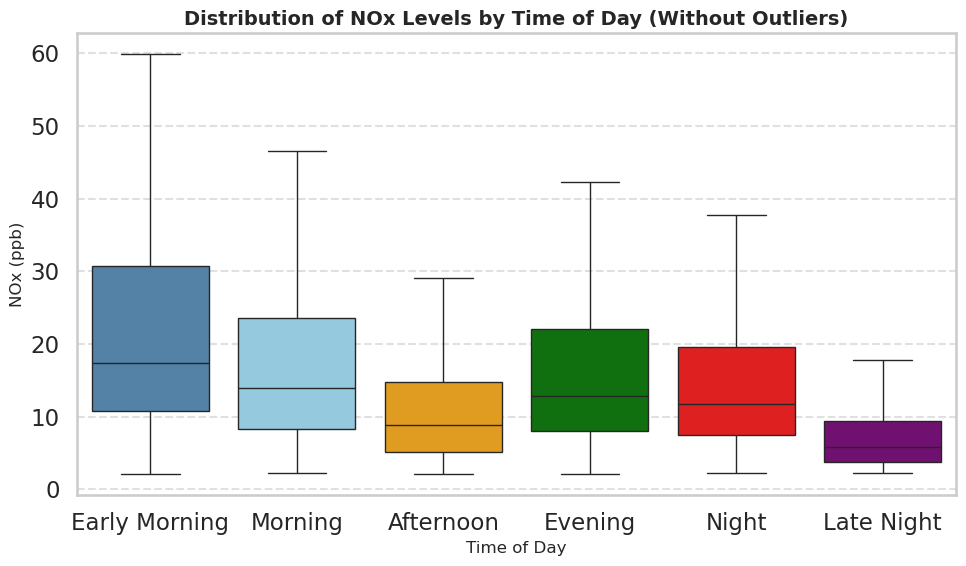

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reorder so 'Late Night' comes after 'Night'
box_df['TimeOfDay'] = pd.Categorical(
    box_df['TimeOfDay'],
    categories=[
        'Early Morning', 'Morning', 'Afternoon',
        'Evening', 'Night', 'Late Night'  # 'Late Night' moved to end
    ],
    ordered=True
)

# Filter rows where NOx_ppb > 1
filtered_df = box_df[box_df['NOx_ppb'] > 1]

# Define matching color palette
time_palette = {
    'Early Morning': 'steelblue',
    'Morning': 'skyblue',
    'Afternoon': 'orange',
    'Evening': 'green',
    'Night': 'red',
    'Late Night': 'purple'
}

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=filtered_df,
    x='TimeOfDay',
    y='NOx_ppb',
    palette=time_palette,
    showfliers=False
)

plt.title('Distribution of NOx Levels by Time of Day (Without Outliers)', fontsize=14, fontweight='bold')
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('NOx (ppb)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipykernel_93772/1751466032.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_93772/1751466032.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_93772/1751466032.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_93772/1751466032.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_93772/1751466032.py:40: FutureWarning:



Passing `palette` without assigning `hue` is de

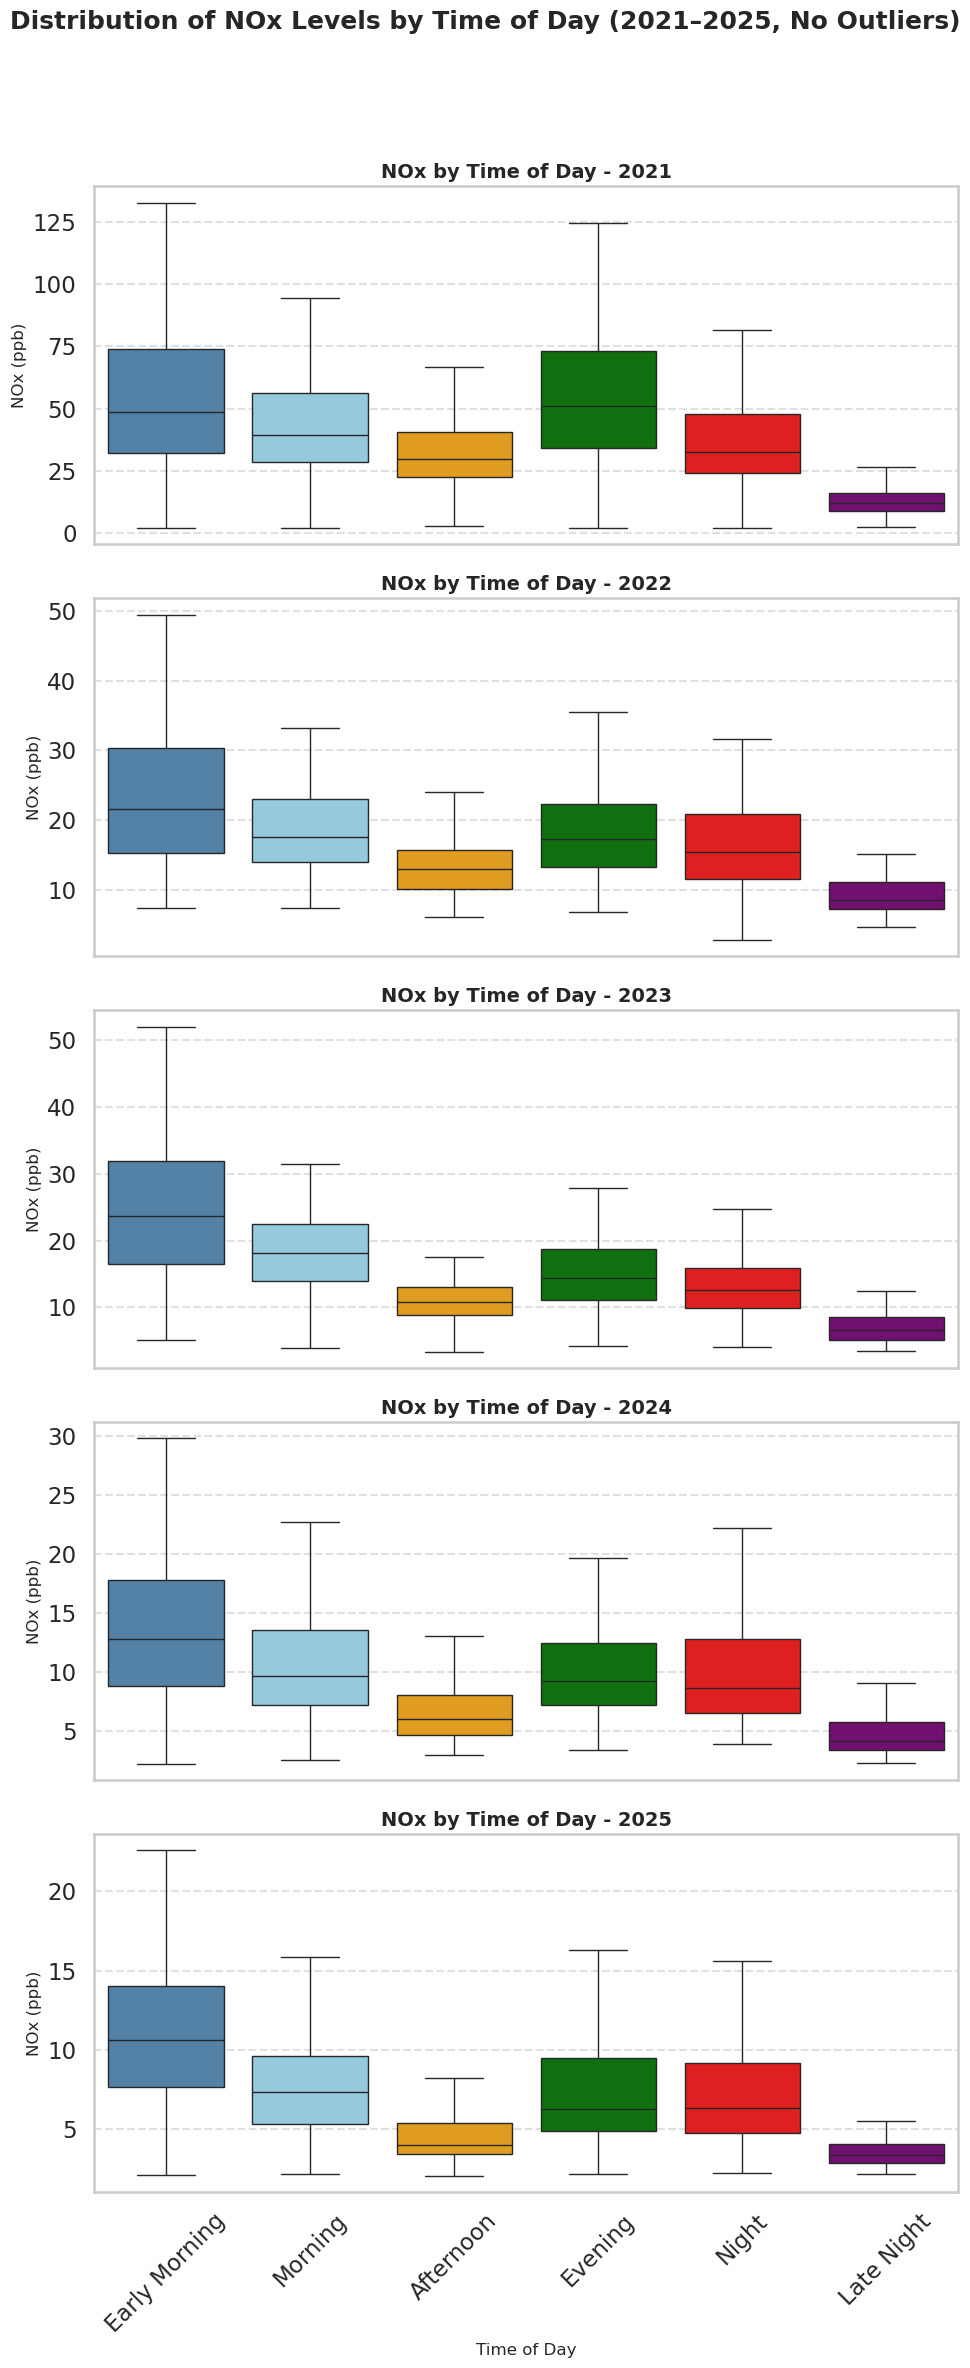

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure DayDate is datetime and extract Year
box_df['DayDate'] = pd.to_datetime(box_df['DayDate'])
box_df['Year'] = box_df['DayDate'].dt.year

# Reorder TimeOfDay with 'Late Night' last
box_df['TimeOfDay'] = pd.Categorical(
    box_df['TimeOfDay'],
    categories=[
        'Early Morning', 'Morning', 'Afternoon',
        'Evening', 'Night', 'Late Night'
    ],
    ordered=True
)

# Filter NOx > 1
filtered_df = box_df[box_df['NOx_ppb'] > 1]

# Define color palette
time_palette = {
    'Early Morning': 'steelblue',
    'Morning': 'skyblue',
    'Afternoon': 'orange',
    'Evening': 'green',
    'Night': 'red',
    'Late Night': 'purple'
}

# Define years to plot
years = [2021, 2022, 2023, 2024, 2025]

# Setup vertical subplots
fig, axes = plt.subplots(len(years), 1, figsize=(10, 25), sharex=True)

for i, year in enumerate(years):
    year_data = filtered_df[filtered_df['Year'] == year]
    sns.boxplot(
        data=year_data,
        x='TimeOfDay',
        y='NOx_ppb',
        palette=time_palette,
        showfliers=False,
        ax=axes[i]
    )
    axes[i].set_title(f'NOx by Time of Day - {year}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('NOx (ppb)', fontsize=12)
    axes[i].set_xlabel('Time of Day', fontsize=12)  # x-axis label for each plot
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_xlim(-0.5, 5.5)  # fixed x-axis range for all plots

# Rotate x-ticks only on the bottom plot
axes[-1].tick_params(axis='x', rotation=45)

plt.suptitle('Distribution of NOx Levels by Time of Day (2021–2025, No Outliers)', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Save the plot
plt.savefig('nox_boxplots_byyear.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [62]:
# Create Diurnal Plot
diurnal_df = diurnal_df.drop(columns=['DayDate', 'Year', 'TimeOfDay','Month','Day','Hour'])
# View data
diurnal_df.head(15)

Date     NO_ppb    NO2_ppb    NOx_ppb
0  2021-01-14 05:00:00  15.168343  34.974838  50.143181
1  2021-01-14 05:00:00   5.453504  11.882874  17.336376
2  2021-01-14 05:00:00   2.351893  14.811316  17.163208
3  2021-01-14 05:00:00  15.131422  26.287502  41.418922
4  2021-01-14 05:00:00  39.061401  33.478600  72.540001
5  2021-01-14 05:00:00   9.576481  13.982386  23.558867
6  2021-01-14 05:00:00  13.168915  22.084198  35.253113
7  2021-01-14 05:00:00  21.291302  29.511658  50.802959
8  2021-01-14 05:00:00   9.195171  17.300301  26.495472
9  2021-01-14 05:00:00  15.787762  24.817516  40.605278
10 2021-01-14 05:00:00  14.262720  24.556965  38.819683
11 2021-01-14 05:00:00  13.225117  23.424366  36.649483
12 2021-01-14 06:00:00  38.532776  34.554855  73.087631
13 2021-01-14 06:00:00  11.183666  20.527111  31.710777
14 2021-01-14 06:00:00  13.056095  21.598141  34.654236

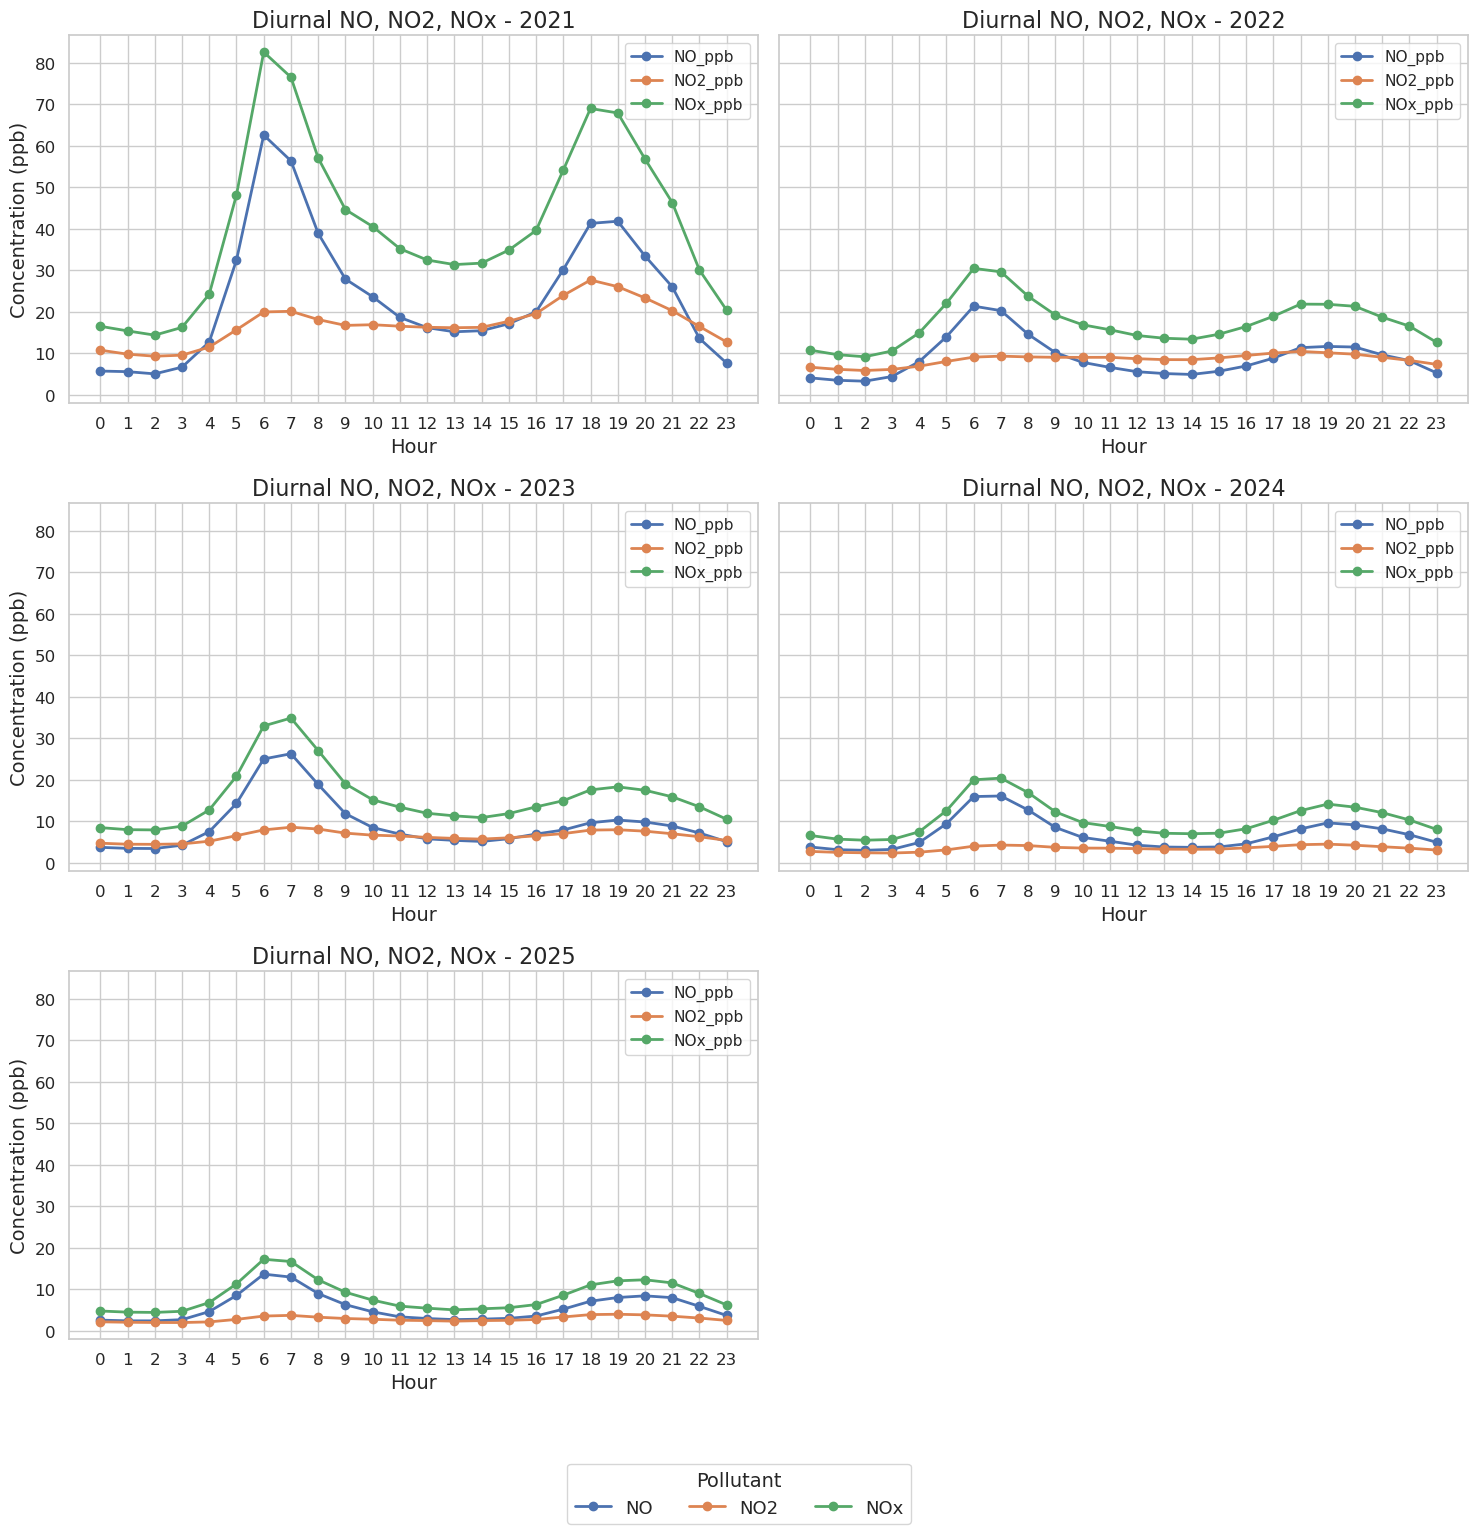

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime format
diurnal_df['Date'] = pd.to_datetime(diurnal_df['Date'])

# Extract components
diurnal_df['Hour'] = diurnal_df['Date'].dt.hour
diurnal_df['Year'] = diurnal_df['Date'].dt.year

# Set plot style and font scale
sns.set(style='whitegrid')
plt.rcParams.update({'font.size': 14})  # Default font size for everything

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharey=True)
axes = axes.flatten()

years = range(2021, 2026)

for idx, year in enumerate(years):
    ax = axes[idx]
    year_data = diurnal_df[diurnal_df['Year'] == year]

    # Group by hour and calculate mean of NO, NO2, and NOx
    hourly_means = year_data.groupby('Hour')[['NO_ppb', 'NO2_ppb', 'NOx_ppb']].mean()

    # Plot each pollutant
    hourly_means.plot(ax=ax, marker='o', linewidth=2)

    ax.set_title(f'Diurnal NO, NO2, NOx - {year}', fontsize=16)
    ax.set_xlabel('Hour', fontsize=14)
    ax.set_xticks(range(0, 24))
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    if idx % 2 == 0:
        ax.set_ylabel('Concentration (ppb)', fontsize=14)
    else:
        ax.set_ylabel('')

# Hide unused subplots
if len(years) < len(axes):
    for idx in range(len(years), len(axes)):
        fig.delaxes(axes[idx])

# Add one shared legend below all plots
fig.legend(
    labels=['NO', 'NO2', 'NOx'],
    title="Pollutant",
    loc='lower center',
    ncol=3,
    bbox_to_anchor=(0.5, -0.03),
    fontsize=13,
    title_fontsize=14
)

plt.tight_layout(rect=[0, 0.05, 1, 1])

# Save the plot
plt.savefig('nox_diurnal.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

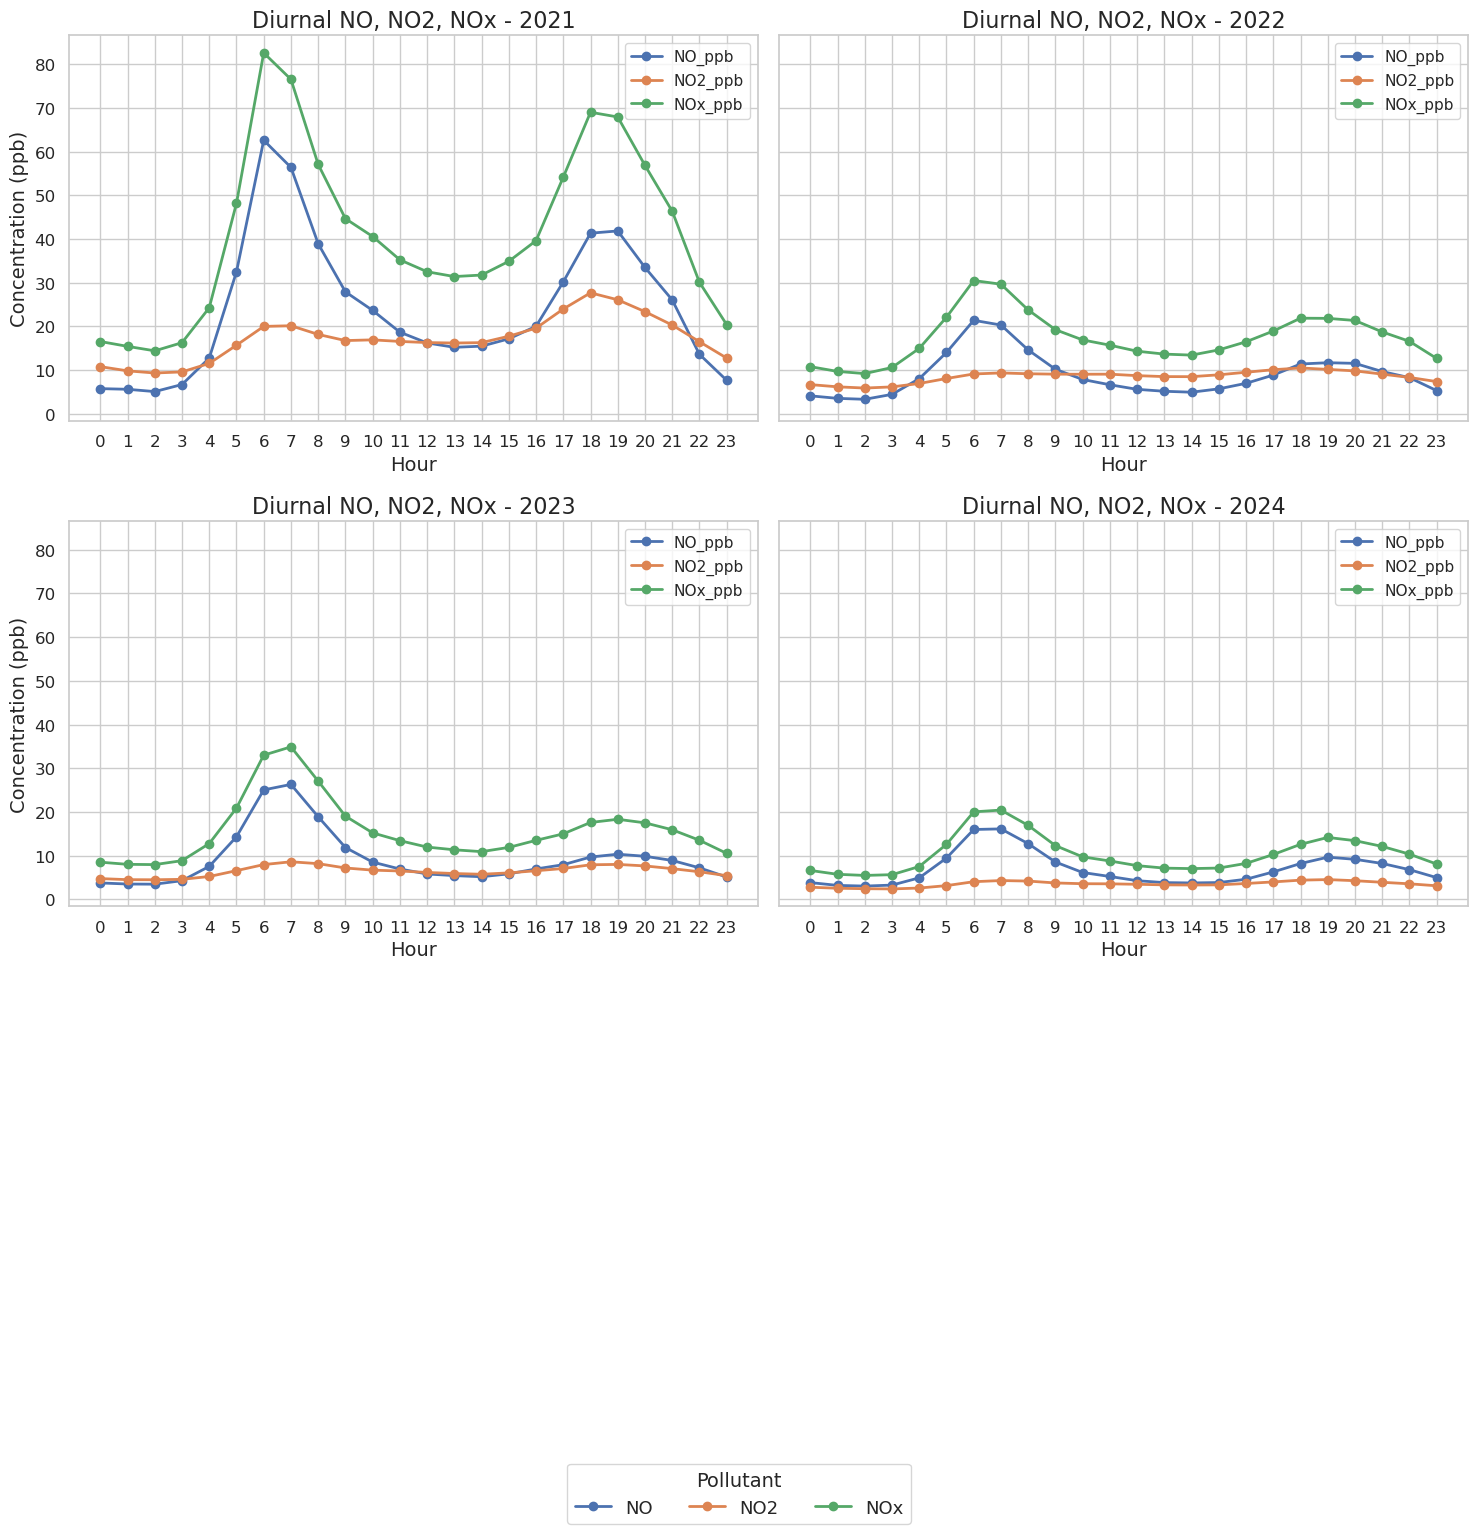

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime format
diurnal_df['Date'] = pd.to_datetime(diurnal_df['Date'])

# Extract components
diurnal_df['Hour'] = diurnal_df['Date'].dt.hour
diurnal_df['Year'] = diurnal_df['Date'].dt.year

# Set plot style and font scale
sns.set(style='whitegrid')
plt.rcParams.update({'font.size': 14})  # Default font size for everything

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharey=True)
axes = axes.flatten()

# Updated years range to exclude 2025
years = range(2021, 2025)

for idx, year in enumerate(years):
    ax = axes[idx]
    year_data = diurnal_df[diurnal_df['Year'] == year]

    # Group by hour and calculate mean of NO, NO2, and NOx
    hourly_means = year_data.groupby('Hour')[['NO_ppb', 'NO2_ppb', 'NOx_ppb']].mean()

    # Plot each pollutant
    hourly_means.plot(ax=ax, marker='o', linewidth=2)

    ax.set_title(f'Diurnal NO, NO2, NOx - {year}', fontsize=16)
    ax.set_xlabel('Hour', fontsize=14)
    ax.set_xticks(range(0, 24))
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    if idx % 2 == 0:
        ax.set_ylabel('Concentration (ppb)', fontsize=14)
    else:
        ax.set_ylabel('')

# Hide unused subplots
for idx in range(len(years), len(axes)):
    fig.delaxes(axes[idx])

# Add one shared legend below all plots
fig.legend(
    labels=['NO', 'NO2', 'NOx'],
    title="Pollutant",
    loc='lower center',
    ncol=3,
    bbox_to_anchor=(0.5, -0.03),
    fontsize=13,
    title_fontsize=14
)

plt.tight_layout(rect=[0, 0.05, 1, 1])

# Save the plot
plt.savefig('nox_diurnal.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()